### Imports and data load

In this section we import (install) all the necessary libraries to work on the project as well as read the data.

In [1]:
!pip install imblearn

In [49]:
# Imports
import numpy as np

np.set_printoptions(suppress=True)

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

from collections import Counter
import scipy.io

from scipy.stats import spearmanr

# Information gain
from sklearn.feature_selection import mutual_info_regression
# ANOVA
from scipy.stats import f_oneway
import matplotlib.patches as mpatches

#Classification task
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression

# Sensitivity Analysis
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
PASTEL_COLORS = ['#B3E6C3', '#FFC3A0', '#FFD966', '#B39EB5', '#C6DEF1', '#FFB7B2']

In [4]:
# Read the data from excel document
radiomics_data = pd.read_excel("data/Homework_Dataset.xlsx", sheet_name="Radiomics")
demographics_data = pd.read_excel("data/Homework_Dataset.xlsx", sheet_name="Demographics Clinical")
clinical_data = pd.read_excel("data/Homework_Dataset.xlsx", sheet_name="CLINICAL")

In [5]:
# 33 patients with PD and 20 HC 
print(f"Groups split: {Counter(demographics_data['Group (1=PD, 0 = Controls)'])}")

Groups split: Counter({1: 33, 0: 20})


## PART 1 - Group Differences

### Is there any difference between controls and PD in radiomics features (or combined score)?

QUALITATIVELY ANALYSIS ON THE ENTIRE DATASET


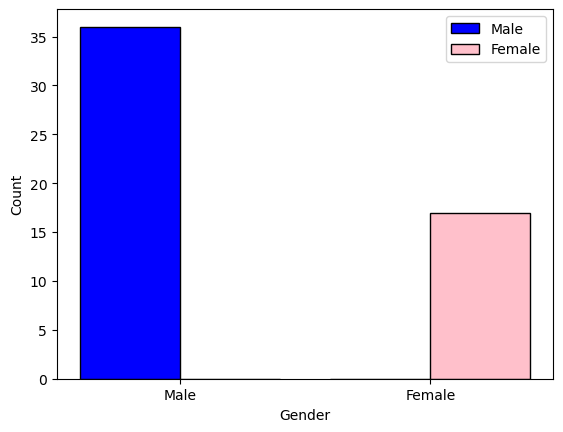

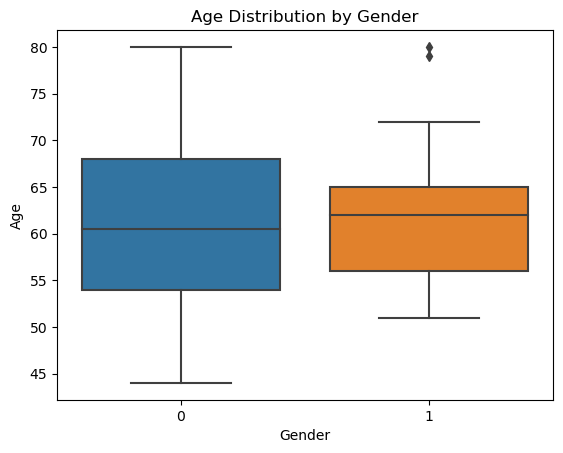

FEMALES
Mean: 62.24
Std dev: 8.55
MALES
Mean: 61.17
Std dev: 9.56
 
Age mean for Males and Females in the entire dataset are comparable.
 


In [6]:
# Performing qualitative analysis of the dataset (sex, age, BMI, etc.)
print("QUALITATIVELY ANALYSIS ON THE ENTIRE DATASET")
males = demographics_data[demographics_data['Gender (M=0, F=1)'] == 0]
females = demographics_data[demographics_data['Gender (M=0, F=1)'] == 1]

plt.hist([males['Gender (M=0, F=1)'], females['Gender (M=0, F=1)']], bins=[0, 1, 2], color=['blue', 'pink'], edgecolor='black', label=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0.5, 1.5], ['Male', 'Female'])
plt.legend()
plt.show()

male_age_mean = males['Age'].mean()
male_age_std = males['Age'].std()

female_age_mean = females['Age'].mean()
female_age_std = females['Age'].std()

sns.boxplot(x=demographics_data['Gender (M=0, F=1)'], y=demographics_data['Age'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

print("FEMALES")
print("Mean: "+str(round(female_age_mean, 2)))
print("Std dev: "+str(round(female_age_std, 2)))

print("MALES")
print("Mean: "+str(round(male_age_mean, 2)))
print("Std dev: "+str(round(male_age_std, 2)))
print(" ")
print("Age mean for Males and Females in the entire dataset are comparable.")
print(" ")

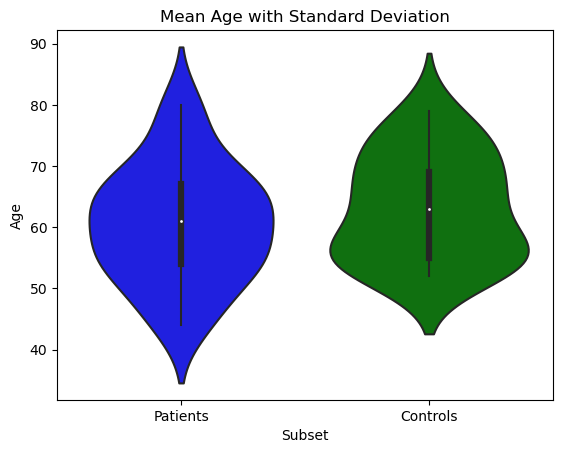

PATIENTS
Mean: 60.55
Std dev: 9.52
CONTROLS
Mean: 63.1
Std dev: 8.59
 
Age mean for Patients and Controls in the entire dataset are comparable.
 


In [7]:
# Comparing the datasets of healthy controls and patients - AGE
demo_df1 = demographics_data.iloc[:33]
demo_df2 = demographics_data.iloc[33:53]

demo_df1_mean = demo_df1['Age'].mean()
demo_df1_std = demo_df1['Age'].std()

demo_df2_mean = demo_df2['Age'].mean()
demo_df2_std = demo_df2['Age'].std()

combined_data = pd.concat([demo_df1['Age'], demo_df2['Age']], axis=1)
combined_data.columns = ['Patients', 'Controls']

sns.violinplot(data=combined_data, palette=['blue', 'green'])
plt.xlabel('Subset')
plt.ylabel('Age')
plt.title('Mean Age with Standard Deviation')
plt.xticks([0, 1], ['Patients', 'Controls'])
plt.show()

print("PATIENTS")
print("Mean: "+str(round(demo_df1_mean, 2)))
print("Std dev: "+str(round(demo_df1_std, 2)))

print("CONTROLS")
print("Mean: "+str(round(demo_df2_mean, 2)))
print("Std dev: "+str(round(demo_df2_std, 2)))
print(" ")
print("Age mean for Patients and Controls in the entire dataset are comparable.")
print(" ")

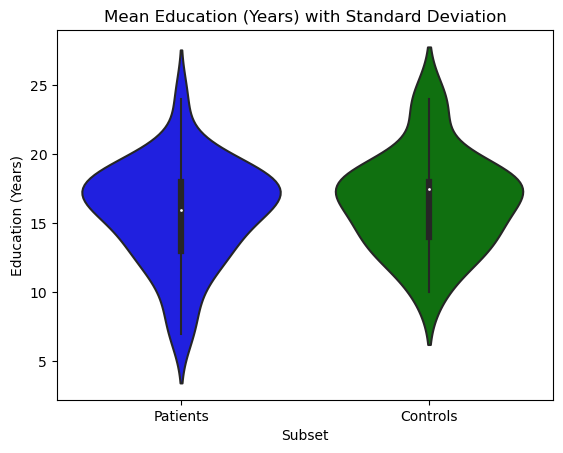

PATIENTS
Mean: 15.79
Std dev: 3.59
CONTROLS
Mean: 16.55
Std dev: 3.44
 
Education (Years) mean for Patients and Controls in the entire dataset are comparable.
 


In [8]:
# Comparing the datasets of healthy controls and patients - EDUCATION
demo_df1_mean = demo_df1['Education (Years)'].mean()
demo_df1_std = demo_df1['Education (Years)'].std()

demo_df2_mean = demo_df2['Education (Years)'].mean()
demo_df2_std = demo_df2['Education (Years)'].std()

combined_data = pd.concat([demo_df1['Education (Years)'], demo_df2['Education (Years)']], axis=1)
combined_data.columns = ['Patients', 'Controls']

sns.violinplot(data=combined_data, palette=['blue', 'green'])
plt.xlabel('Subset')
plt.ylabel('Education (Years)')
plt.title('Mean Education (Years) with Standard Deviation')
plt.xticks([0, 1], ['Patients', 'Controls'])
plt.show()

print("PATIENTS")
print("Mean: "+str(round(demo_df1_mean, 2)))
print("Std dev: "+str(round(demo_df1_std, 2)))

print("CONTROLS")
print("Mean: "+str(round(demo_df2_mean, 2)))
print("Std dev: "+str(round(demo_df2_std, 2)))
print(" ")
print("Education (Years) mean for Patients and Controls in the entire dataset are comparable.")
print(" ")

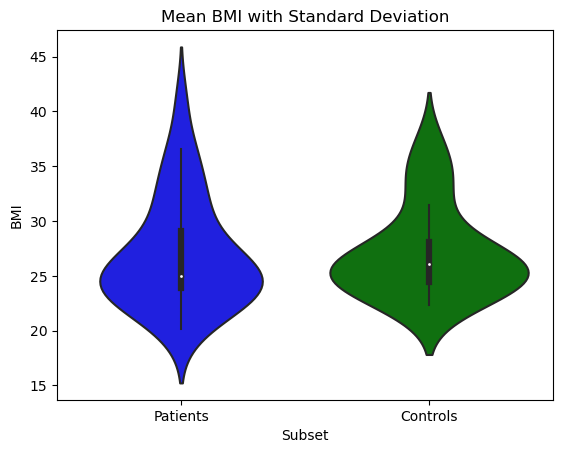

PATIENTS
Mean: 26.98
Std dev: 4.99
CONTROLS
Mean: 27.12
Std dev: 4.14
 
BMI mean for Patients and Controls in the entire dataset are comparable.
 


In [9]:
# Comparing the datasets of healthy controls and patients - BMI
demo_df1_mean = demo_df1['BMI'].mean()
demo_df1_std = demo_df1['BMI'].std()

demo_df2_mean = demo_df2['BMI'].mean()
demo_df2_std = demo_df2['BMI'].std()

combined_data = pd.concat([demo_df1['BMI'], demo_df2['BMI']], axis=1)
combined_data.columns = ['Patients', 'Controls']

sns.violinplot(data=combined_data, palette=['blue', 'green'])
plt.xlabel('Subset')
plt.ylabel('BMI')
plt.title('Mean BMI with Standard Deviation')
plt.xticks([0, 1], ['Patients', 'Controls'])
plt.show()

print("PATIENTS")
print("Mean: "+str(round(demo_df1_mean, 2)))
print("Std dev: "+str(round(demo_df1_std, 2)))

print("CONTROLS")
print("Mean: "+str(round(demo_df2_mean, 2)))
print("Std dev: "+str(round(demo_df2_std, 2)))
print(" ")
print("BMI mean for Patients and Controls in the entire dataset are comparable.")
print(" ")

#### Selecting the most discriminant features

In [10]:
# Creating a merged dataset with disease labels
radiomics_data_labelled = radiomics_data.merge(
    demographics_data[['id_subject', 'Group (1=PD, 0 = Controls)']], 
    on='id_subject')

radiomics_data_labelled.head()

,id_subject,loc_peak_loc,loc_peak_glob,stat_mean,stat_var,stat_skew,stat_kurt,stat_median,stat_min,stat_p10,...,ngl_glnu_d1_a0.0_3d_fbs_w0.0125,ngl_glnu_norm_d1_a0.0_3d_fbs_w0.0125,ngl_dcnu_d1_a0.0_3d_fbs_w0.0125,ngl_dcnu_norm_d1_a0.0_3d_fbs_w0.0125,ngl_dc_perc_d1_a0.0_3d_fbs_w0.0125,ngl_gl_var_d1_a0.0_3d_fbs_w0.0125,ngl_dc_var_d1_a0.0_3d_fbs_w0.0125,ngl_dc_entr_d1_a0.0_3d_fbs_w0.0125,ngl_dc_energy_d1_a0.0_3d_fbs_w0.0125,"Group (1=PD, 0 = Controls)"
0,ID_1,4.367148,4.378462,2.228290,0.667989,1.530631,1.511877,1.908921,1.500030,1.561387,...,30.287064,0.011005,1104.584302,0.401375,1,4274.447885,1.368704,8.429116,0.003936,1
1,ID_2,3.779030,3.803949,2.187555,0.384019,1.326379,1.168714,1.986067,1.500117,1.594954,...,20.953263,0.009239,1119.872134,0.493771,1,2456.642411,0.522943,8.141883,0.004538,1
2,ID_3,3.233660,3.233798,2.276786,0.359799,0.538311,-0.959822,2.123215,1.500243,1.591756,...,15.005285,0.007931,1018.762156,0.538458,1,2301.951850,0.413739,8.058827,0.004580,1
3,ID_4,5.084474,5.290133,2.677889,0.565180,1.113553,1.230447,2.510247,1.500425,1.856742,...,17.194819,0.005939,1527.539551,0.527648,1,3617.937748,0.446256,8.603763,0.003210,1
4,ID_5,4.535594,4.535594,2.165708,0.586335,1.631404,2.061551,1.837124,1.500109,1.555559,...,29.666667,0.012330,892.307564,0.370868,1,3753.531084,1.305924,8.368670,0.004104,1


In [11]:
# Calculate Spearman correlation on the radiomics features dataset
# and disregard the features if the correlation is higher than 0.2
corr_data = radiomics_data[radiomics_data.columns[1:]]
spearman_corr_df = pd.DataFrame(columns=corr_data.columns, index=corr_data.columns)

# Calculate the p-values for spearman correlation
p_values = pd.DataFrame(columns=spearman_corr_df.columns, index=spearman_corr_df.columns)
for col1 in spearman_corr_df.columns:
    for col2 in spearman_corr_df.columns:
        coef, p_value = spearmanr(corr_data[col1], corr_data[col2])
        p_values.loc[col1, col2] = p_value
        spearman_corr_df.loc[col1, col2] = coef

spearman_corr_df_abs = np.abs(spearman_corr_df)

/Users/diogjen/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


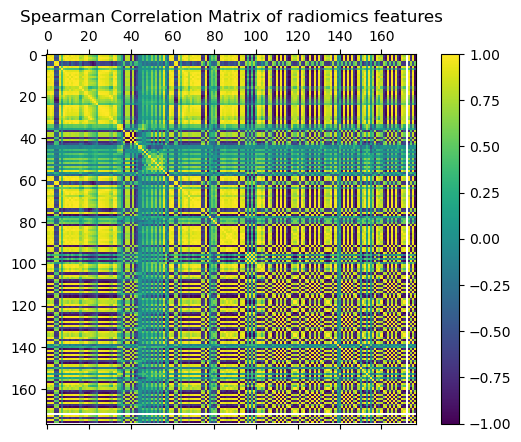

In [12]:
spearman_corr_df = spearman_corr_df.apply(pd.to_numeric)
spearman_corr_df_abs = spearman_corr_df_abs.apply(pd.to_numeric)
# Plot the correlation matrix
figure = plt.figure()
# using the matshow() function
axes = figure.add_subplot(111)
caxes = axes.matshow(spearman_corr_df)
figure.colorbar(caxes)
plt.title('Spearman Correlation Matrix of radiomics features')
plt.show()

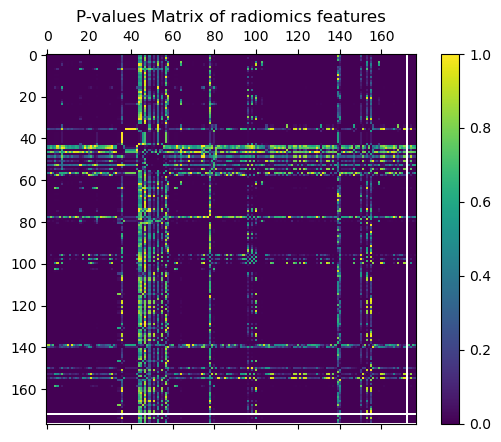

In [13]:
# Plot the p-value matrix
# If the p-value is < 0.05, we can suggest that the observed correlation 
# is statistically significant and the relationship is strong.
p_values = p_values.apply(pd.to_numeric)
figure = plt.figure()
# using the matshow() function
axes = figure.add_subplot(111)
caxes = axes.matshow(p_values)
figure.colorbar(caxes)
plt.title('P-values Matrix of radiomics features')
plt.show()

In [14]:
# Create a mask to filter out highly correlated features
mask_corr = np.ones_like(spearman_corr_df_abs, dtype=bool)
high_corr_indices = np.where(abs(spearman_corr_df_abs) >= 0.2)
mask_corr[high_corr_indices] = False

# Create a mask to filter out features with high p-values
mask_pval = np.array(p_values <= 0.05)

# Combine the masks
combined_mask = np.logical_and(mask_corr, mask_pval)
# combined_mask = mask_corr

# Apply the mask to get the selected features
selected_features = np.array(range(spearman_corr_df_abs.shape[0]))[combined_mask.sum(axis=0) > 0]

# Print the selected features
print("Selected features:", selected_features)
if len(selected_features) == 0:
    print("There are no features that suit the condition of weak correlation AND p-value < 0.05")

Selected features: []
There are no features that suit the condition of weak correlation AND p-value < 0.05


From the analysis of correlation matrix and the p-values that are implying the statistical significance of the derived correlation coefficient, we can conclude, that there are no features with low correlation and low p-values, so there are no uncorrelated features that at the same time have a statistically significant score. That is why we drop this method of selecting a subset of the most imformative features and try the following one.  

In [15]:
# #Drop the outliers from the dataframe
# val=[13,16,32,37,52]
# df_drop = radiomics_data.copy(deep=True)
# df_demo = demographics_data.copy(deep=True)

# df_drop=df_drop.drop(val)
# df_demo=df_demo.drop(val)
# # df_drop.iloc[:30]

In [16]:
# # This part selects top 10 features with the biggest intra-variability
# # Based on this, the t-test is computed to compare two groups (HC vs. PD)
# # If p-value < 0.05, we accept the feature with high variability as the discriminant among the groups
# df1 = df_drop.iloc[:30][radiomics_data.columns[1:]]
# df2 = df_drop.iloc[30:][radiomics_data.columns[1:]]

# mean_df1 = df1.mean()
# std_dev_df1 = df1.std()

# mean_df2 = df2.mean()
# std_dev_df2 = df2.std()

# threshold=0.3 # Can be modified

# percentage_diff = (mean_df2-mean_df1)/ mean_df1 
# num_above_threshold = (percentage_diff > threshold).sum()
# print("Number of values with difference above the threshold(mean): "+str(num_above_threshold))

# percentage_diff = (std_dev_df2-std_dev_df1)/ std_dev_df1 

# percentage_diff.replace([np.inf, -np.inf], np.nan, inplace=True)

# num_above_threshold = (percentage_diff > threshold).sum()
# print("Number of values with difference above the threshold(Std dev): "+str(num_above_threshold))

# sorted_features = percentage_diff.sort_values(ascending=False)

# k=20
# top_k_features = sorted_features[:k].index.tolist()


# p_values = []
# for feature in top_k_features:
#     _, p_value = ttest_ind(df1[feature], df2[feature])
#     p_values.append(p_value)

# print()
# print("P-VALUE computed on features with highest difference in std dev between patients and controls:")
# print()
# c = 1
# suitable_features = []
# for i, feature in enumerate(top_k_features):
#     if c == 11:
#         break
#     if p_values[i] <= 0.05:
#         suitable_features.append(i)
#         print(f"Feature {c}: {feature}, p-value: {p_values[i]}")
#         c += 1

# top_k_features = [top_k_features[i] for i in suitable_features]

        

In [17]:
# This part selects top 10 features with the biggest intra-variability
# Based on this, the t-test is computed to compare two groups (HC vs. PD)
# If p-value < 0.05, we accept the feature with high variability as the discriminant among the groups
df1 = radiomics_data.iloc[:33][radiomics_data.columns[1:]]
df2 = radiomics_data.iloc[33:53][radiomics_data.columns[1:]]

mean_df1 = df1.mean()
std_dev_df1 = df1.std()

mean_df2 = df2.mean()
std_dev_df2 = df2.std()

threshold=0.3 # Can be modified

percentage_diff = (mean_df2-mean_df1)/ mean_df1 
num_above_threshold = (percentage_diff > threshold).sum()
print("Number of values with difference above the threshold(mean): "+str(num_above_threshold))

percentage_diff = (std_dev_df2-std_dev_df1)/ std_dev_df1 
num_above_threshold = (percentage_diff > threshold).sum()
print("Number of values with difference above the threshold(Std dev): "+str(num_above_threshold))

sorted_features = percentage_diff.sort_values(ascending=False)

k=20
top_k_features = sorted_features[:k].index.tolist()


p_values = []
for feature in top_k_features:
    _, p_value = ttest_ind(df1[feature], df2[feature])
    p_values.append(p_value)

print()
print("P-VALUE computed on features with highest difference in std dev between patients and controls:")
print()
c = 1
suitable_features = []
for i, feature in enumerate(top_k_features):
    if c == 11:
        break
    if p_values[i] <= 0.05:
        suitable_features.append(i)
        print(f"Feature {c}: {feature}, p-value: {p_values[i]}")
        c += 1

top_k_features = [top_k_features[i] for i in suitable_features]


Number of values with difference above the threshold(mean): 76
Number of values with difference above the threshold(Std dev): 65

P-VALUE computed on features with highest difference in std dev between patients and controls:

Feature 1: ngt_complexity_3d_fbs_w0.0125, p-value: 0.018918074719977543
Feature 2: dzm_ldhge_3d_fbs_w0.0125, p-value: 0.009577428214606843
Feature 3: ngl_ldhge_d1_a0.0_3d_fbs_w0.0125, p-value: 0.01172137412934654
Feature 4: cm_auto_corr_d1_3d_avg_fbs_w0.0125, p-value: 0.008619676942465983
Feature 5: cm_contrast_d1_3d_avg_fbs_w0.0125, p-value: 0.00021361038973060457
Feature 6: ngl_hgce_d1_a0.0_3d_fbs_w0.0125, p-value: 0.009058226846162067
Feature 7: rlm_srhge_3d_avg_fbs_w0.0125, p-value: 0.00925408148551132
Feature 8: rlm_hgre_3d_avg_fbs_w0.0125, p-value: 0.009167857102038242
Feature 9: rlm_lrhge_3d_avg_fbs_w0.0125, p-value: 0.008839295340049241
Feature 10: szm_szhge_3d_fbs_w0.0125, p-value: 0.012170271195974781


In [18]:
top_k_features

['ngt_complexity_3d_fbs_w0.0125',
 'dzm_ldhge_3d_fbs_w0.0125',
 'ngl_ldhge_d1_a0.0_3d_fbs_w0.0125',
 'cm_auto_corr_d1_3d_avg_fbs_w0.0125',
 'cm_contrast_d1_3d_avg_fbs_w0.0125',
 'ngl_hgce_d1_a0.0_3d_fbs_w0.0125',
 'rlm_srhge_3d_avg_fbs_w0.0125',
 'rlm_hgre_3d_avg_fbs_w0.0125',
 'rlm_lrhge_3d_avg_fbs_w0.0125',
 'szm_szhge_3d_fbs_w0.0125']

Now, the selected features can be analysed visually by calculating the mean, standard deviation and coefficient of variation to analyse the between-subject variability. 

In [19]:
# # Creating a merged dataset with disease labels
# df_drop_labelled = df_drop.merge(
#     df_demo[['id_subject', 'Group (1=PD, 0 = Controls)']], 
#     on='id_subject')

# df_drop_labelled.head()

In [20]:
# Split the dataset on PD and HC dataframes
radiomics_pd_data = radiomics_data_labelled[radiomics_data_labelled['Group (1=PD, 0 = Controls)'] == 1]
radiomics_hc_data = radiomics_data_labelled[radiomics_data_labelled['Group (1=PD, 0 = Controls)'] == 0]

In [21]:
# Select only the subset of features we have identified previously
rad_pd_df_subset = radiomics_pd_data[top_k_features]
rad_hc_df_subset = radiomics_hc_data[top_k_features]

In [22]:
# Select only the subset of features we have identified previously
# rad_pd_df_subset = radiomics_pd_data[important_features]
# rad_hc_df_subsaet = radiomics_hc_data[important_features]

In [23]:
# Between-subject variability
df_pd_bs_var = pd.DataFrame(index=rad_pd_df_subset.columns, columns=['mean', 'std', 'CV'])
df_pd_bs_var['mean'] = round(rad_pd_df_subset.mean(), 5)
df_pd_bs_var['std'] = round(rad_pd_df_subset.std(), 5)
df_pd_bs_var['CV'] = round(df_pd_bs_var['std'] / df_pd_bs_var['mean'] * 100, 5)
df_pd_bs_var


,mean,std,CV
ngt_complexity_3d_fbs_w0.0125,221935.84905,289557.19608,130.46887
dzm_ldhge_3d_fbs_w0.0125,75172.20668,119820.95071,159.39528
ngl_ldhge_d1_a0.0_3d_fbs_w0.0125,9356.50942,16447.53122,175.78704
cm_auto_corr_d1_3d_avg_fbs_w0.0125,11183.21635,18766.96351,167.81365
cm_contrast_d1_3d_avg_fbs_w0.0125,564.86551,412.61034,73.04577
ngl_hgce_d1_a0.0_3d_fbs_w0.0125,11094.22985,19028.16506,171.51407
rlm_srhge_3d_avg_fbs_w0.0125,11091.93624,19003.55955,171.32770
rlm_hgre_3d_avg_fbs_w0.0125,11169.21302,19120.40159,171.18844
rlm_lrhge_3d_avg_fbs_w0.0125,11487.67758,19603.32214,170.64652
szm_szhge_3d_fbs_w0.0125,11154.68644,18967.27568,170.03863


In [24]:
# Between-subject variability
df_hc_bs_var = pd.DataFrame(index=rad_hc_df_subset.columns, columns=['mean', 'std', 'CV'])
df_hc_bs_var['mean'] = round(rad_hc_df_subset.mean(), 5)
df_hc_bs_var['std'] = round(rad_hc_df_subset.std(), 5)
df_hc_bs_var['CV'] = round(df_hc_bs_var['std'] / df_hc_bs_var['mean'] * 100, 5)
df_hc_bs_var


,mean,std,CV
ngt_complexity_3d_fbs_w0.0125,1.052185e+06,1.943953e+06,184.75388
dzm_ldhge_3d_fbs_w0.0125,4.149704e+05,7.129477e+05,171.80689
ngl_ldhge_d1_a0.0_3d_fbs_w0.0125,4.573098e+04,7.755406e+04,169.58759
cm_auto_corr_d1_3d_avg_fbs_w0.0125,5.395489e+04,8.716564e+04,161.55282
cm_contrast_d1_3d_avg_fbs_w0.0125,1.915941e+03,1.884402e+03,98.35387
ngl_hgce_d1_a0.0_3d_fbs_w0.0125,5.137471e+04,8.219501e+04,159.99121
rlm_srhge_3d_avg_fbs_w0.0125,5.117300e+04,8.202923e+04,160.29789
rlm_hgre_3d_avg_fbs_w0.0125,5.140456e+04,8.220978e+04,159.92701
rlm_lrhge_3d_avg_fbs_w0.0125,5.235012e+04,8.295375e+04,158.45953
szm_szhge_3d_fbs_w0.0125,4.880860e+04,8.003584e+04,163.97897


In [25]:
pd_cv = df_pd_bs_var['CV']
hc_cv = df_hc_bs_var['CV']

sorted_indices = np.argsort(-pd_cv)
pd_cv_sorted = pd_cv[sorted_indices]

# Rearrange array2 based on the sorting order of array1
hc_cv_sorted = hc_cv[sorted_indices]

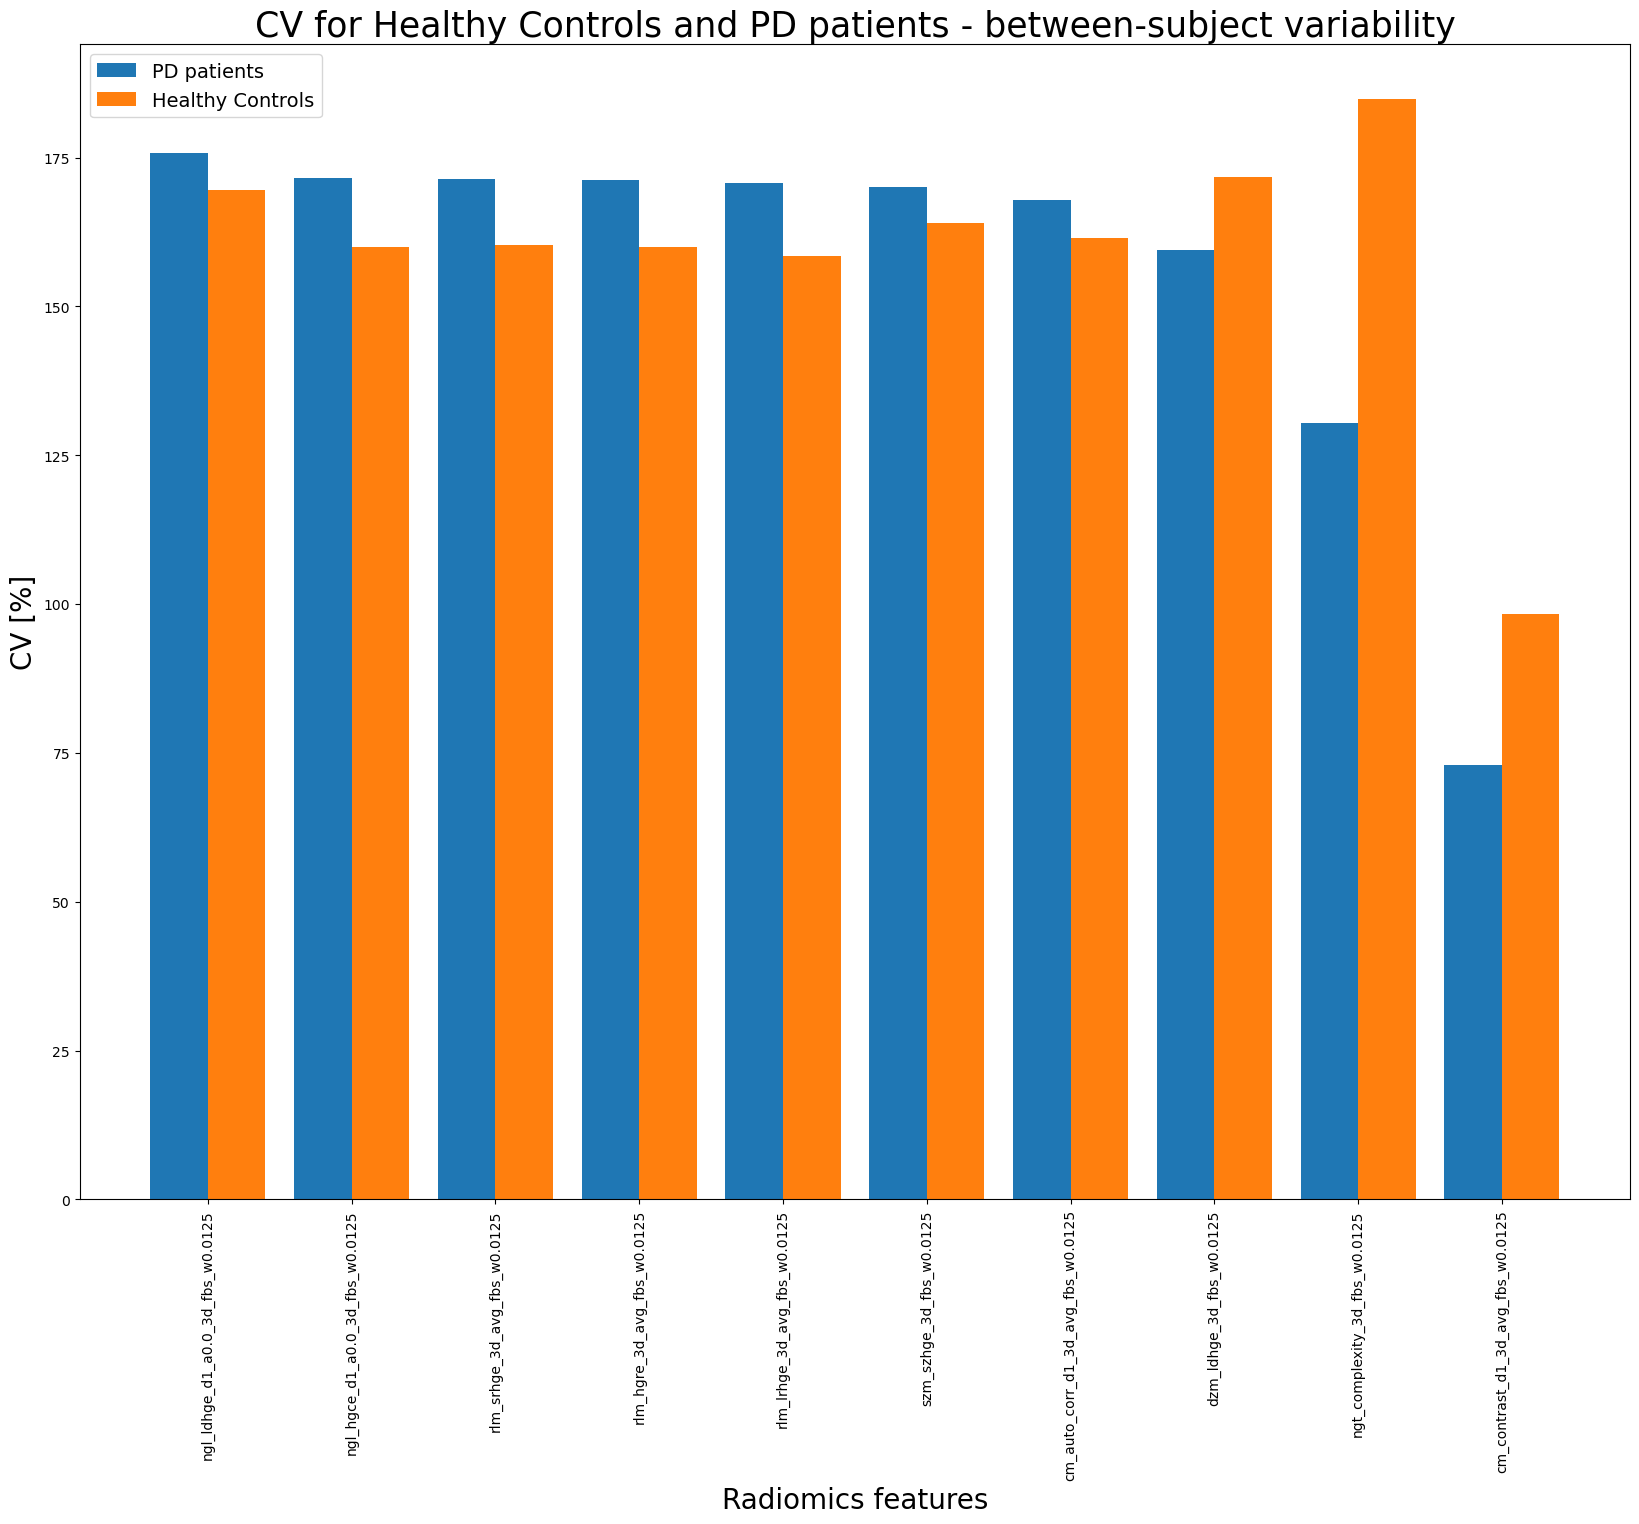

In [26]:
X = rad_hc_df_subset.columns[sorted_indices]
X_axis = np.arange(len(X))

plt.figure(figsize=(20, 15))

plt.bar(X_axis - 0.2, pd_cv_sorted, 0.4, label = 'PD patients')
plt.bar(X_axis + 0.2, hc_cv_sorted, 0.4, label = 'Healthy Controls')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Radiomics features", fontsize=20)
plt.ylabel("CV [%]", fontsize=20)
plt.title("CV for Healthy Controls and PD patients - between-subject variability", 
         fontsize=25)
plt.legend(fontsize=14)
plt.show()

As we can see, some of the CV [%] values are higher than 100%, which from the statistics itself means that for some values standard deviation is higher than the mean. 
We visualize the data below to see the representation of a sample variable on the plot. 

/var/folders/zk/9vvknt8s4f3cfymmhds2d_wc0000gn/T/ipykernel_2500/3315582794.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rad_hc_df_subset.iloc[:, 8], shade=True, color="g", label="Healthy Controls", alpha=.7)
/var/folders/zk/9vvknt8s4f3cfymmhds2d_wc0000gn/T/ipykernel_2500/3315582794.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rad_pd_df_subset.iloc[:, 8], shade=True, color="deeppink", label="Parkinson's pateints", alpha=.7)


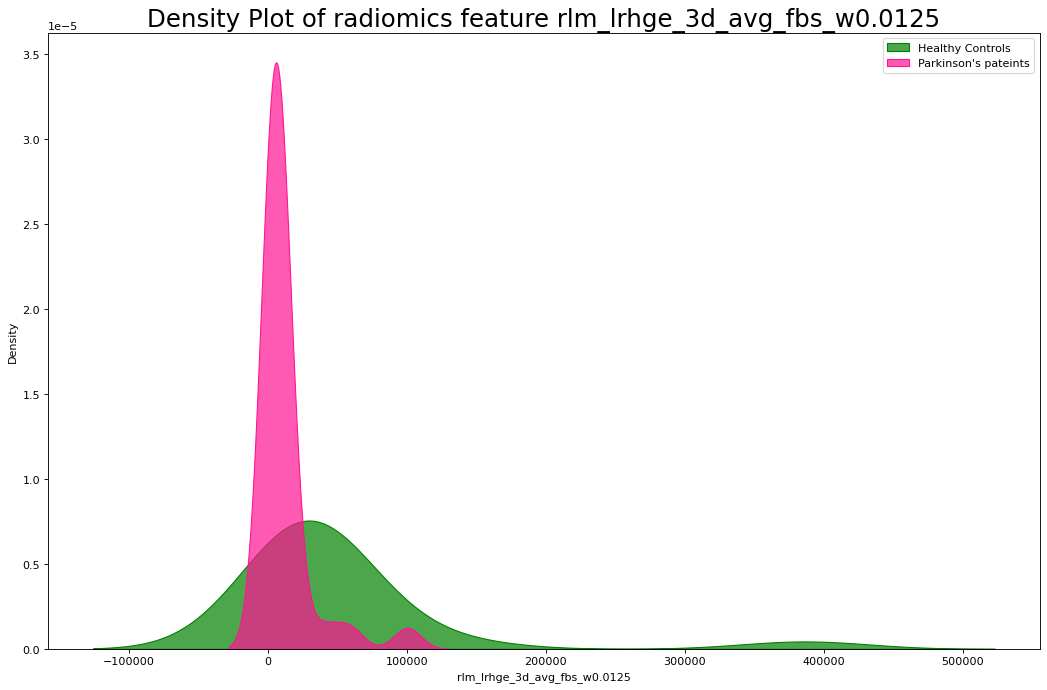

In [27]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(rad_hc_df_subset.iloc[:, 8], shade=True, color="g", label="Healthy Controls", alpha=.7)
sns.kdeplot(rad_pd_df_subset.iloc[:, 8], shade=True, color="deeppink", label="Parkinson's pateints", alpha=.7)

# Decoration
plt.title(f'Density Plot of radiomics feature {rad_hc_df_subset.columns[8]}', fontsize=22)
plt.legend()
plt.show()

### Are the radiomic features or any derived scores associated to PD clinical symptoms severity?

In [28]:
# Observe the dataset
clinical_data.head()

,id_subject,LEDD Total,UPDRS I,UPDRS II,UPDRS III,UPDRS IV,UPDRS total,NMSQ,MMSE,MoCA
0,ID_1,560.0,16,20,55,8,99,12,29,25
1,ID_2,500.0,5,5,23,0,33,1,30,25
2,ID_3,1102.5,21,18,47,8,94,13,28,25
3,ID_4,580.0,8,3,24,0,35,2,30,29
4,ID_5,500.0,8,8,27,0,43,6,30,28


In [29]:
# Extract the data from radiomics and clinical dataset
# Convert the datasets into numpy arrays
rad_features = radiomics_pd_data[
    radiomics_pd_data.columns[1:-1]].to_numpy()

clinical_scores = clinical_data[
    clinical_data.columns[1:]].to_numpy()

In [30]:
# Merge clinical dataset 
corr_dataset = radiomics_pd_data[radiomics_pd_data.columns[:-1]].merge(
    clinical_data, 
    on='id_subject')

corr_dataset = corr_dataset[corr_dataset.columns[1:]]
corr_dataset.head()

,loc_peak_loc,loc_peak_glob,stat_mean,stat_var,stat_skew,stat_kurt,stat_median,stat_min,stat_p10,stat_p90,...,ngl_dc_energy_d1_a0.0_3d_fbs_w0.0125,LEDD Total,UPDRS I,UPDRS II,UPDRS III,UPDRS IV,UPDRS total,NMSQ,MMSE,MoCA
0,4.367148,4.378462,2.228290,0.667989,1.530631,1.511877,1.908921,1.500030,1.561387,3.555293,...,0.003936,560.0,16,20,55,8,99,12,29,25
1,3.779030,3.803949,2.187555,0.384019,1.326379,1.168714,1.986067,1.500117,1.594954,3.153836,...,0.004538,500.0,5,5,23,0,33,1,30,25
2,3.233660,3.233798,2.276786,0.359799,0.538311,-0.959822,2.123215,1.500243,1.591756,3.231028,...,0.004580,1102.5,21,18,47,8,94,13,28,25
3,5.084474,5.290133,2.677889,0.565180,1.113553,1.230447,2.510247,1.500425,1.856742,3.731321,...,0.003210,580.0,8,3,24,0,35,2,30,29
4,4.535594,4.535594,2.165708,0.586335,1.631404,2.061551,1.837124,1.500109,1.555559,3.362177,...,0.004104,500.0,8,8,27,0,43,6,30,28


In [31]:
# Calculate Spearman correlation on the radiomics features dataset + clinical scores
# and disregard the features if the correlation is higher than 0.2
spearman_corr_df = pd.DataFrame(columns=corr_dataset.columns[:-9], 
                                index=corr_dataset.columns[177:])

# Calculate the p-values for spearman correlation
p_values = pd.DataFrame(columns=corr_dataset.columns[:-9], 
                                index=corr_dataset.columns[177:])
for col1 in spearman_corr_df.index:
    for col2 in spearman_corr_df.columns:
        coef, p_value = spearmanr(corr_dataset[col1], corr_dataset[col2])
        p_values.loc[col1, col2] = p_value
        spearman_corr_df.loc[col1, col2] = coef

spearman_corr_df = spearman_corr_df.apply(pd.to_numeric)
# NaN usually means there is no correlation, so we will just set it to 0
spearman_corr_df = spearman_corr_df.fillna(0)

p_values = p_values.apply(pd.to_numeric)
spearman_corr_df_abs = np.abs(spearman_corr_df)


/Users/diogjen/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


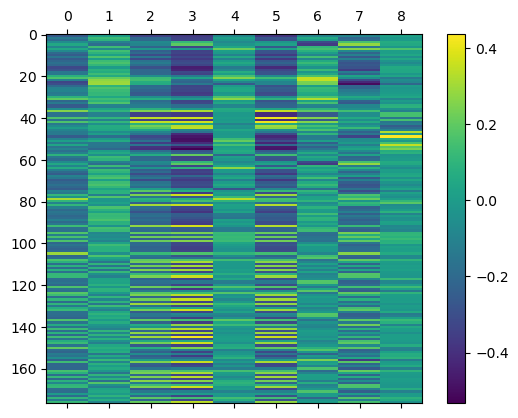

In [32]:
# Plot the Spearman correlation matrix 
figure = plt.figure()
# using the matshow() function
axes = figure.add_subplot(111)
caxes = axes.matshow(spearman_corr_df.T, 
                     interpolation ='nearest', 
                     aspect=1/20)
figure.colorbar(caxes)
plt.show()

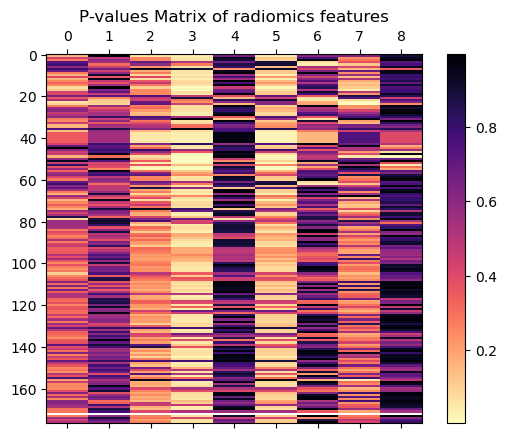

In [33]:
# Plot the p-value matrix
# If the p-value is < 0.05, we can suggest that the observed correlation 
# is statistically significant and the relationship is strong.
p_values = p_values.apply(pd.to_numeric)
figure = plt.figure()
# using the matshow() function
axes = figure.add_subplot(111)
caxes = axes.matshow(p_values.T, 
                interpolation ='nearest', 
                     aspect=1/20, cmap='magma_r')
figure.colorbar(caxes)
plt.title('P-values Matrix of radiomics features')
plt.show()

In [34]:
# For each score, find top features that correlate with this score
# Convert the df to numpy matrix
sc_matrix_np = spearman_corr_df.to_numpy()
sc_matrix_np_abs = np.abs(sc_matrix_np)
p_values_np = p_values.to_numpy()

dict_top_k_features_spearman = {}

# Create a mask based on p-values - if p-value is > 0.1
mask = np.round(p_values_np, 2) > 0.1

# Set correlation values to 0 where the mask is True
sc_matrix_np_abs[mask] = 0

for score in range(sc_matrix_np_abs.shape[0]):
    curr_score_vector = sc_matrix_np_abs[score].reshape(1, -1)
#     print(curr_score_vector)
    # Get the flattened indices of the top 10 maximum values
    flat_indices = np.argpartition(curr_score_vector.flatten(), -10)[-10:]

    # Convert flattened indices to (i, j) coordinates
    indices = np.unravel_index(flat_indices, curr_score_vector.shape)

    # Get the values and corresponding indices
    top_values = curr_score_vector[indices]
    top_indices = list(zip(indices[0], indices[1]))

    # Print the top 10 maximum values and their indices
    print(f"CLINICAL SCORE: {clinical_data.columns[score+1]}")
    tmp = []
    for value, (i, j) in sorted(zip(top_values, top_indices), key=lambda x: x[0]):
        if round(p_values_np[score][j], 3) > 0.1: continue
        tmp.append(j)
        print(f"Feature: {spearman_corr_df.columns[j]}, value: {round(sc_matrix_np[score][j], 3)}, p-value: {round(p_values_np[score][j], 3)}")
    print('\n\n')
    dict_top_k_features_spearman[clinical_data.columns[score+1]] = tmp

#     break 
    

CLINICAL SCORE: LEDD Total 
Feature: cm_info_corr1_d1_3d_avg_fbs_w0.0125, value: 0.292, p-value: 0.099
Feature: ivh_v90, value: -0.3, p-value: 0.089
Feature: ih_max_grad_g_fbs_w0.0125, value: 0.31, p-value: 0.08
Feature: stat_cov, value: -0.318, p-value: 0.072
Feature: ivh_v75, value: -0.329, p-value: 0.061



CLINICAL SCORE: UPDRS I
Feature: ivh_v75, value: 0.292, p-value: 0.099
Feature: ivh_v90, value: 0.296, p-value: 0.095



CLINICAL SCORE: UPDRS II
Feature: loc_peak_loc, value: -0.332, p-value: 0.059
Feature: loc_peak_glob, value: -0.333, p-value: 0.059
Feature: morph_comp_1, value: -0.346, p-value: 0.049
Feature: morph_comp_2, value: -0.346, p-value: 0.049
Feature: morph_sph_dispr, value: 0.346, p-value: 0.049
Feature: morph_sphericity, value: -0.346, p-value: 0.049
Feature: morph_asphericity, value: 0.346, p-value: 0.049
Feature: morph_vol_dens_aee, value: -0.353, p-value: 0.044
Feature: morph_vol_dens_conv_hull, value: -0.382, p-value: 0.028
Feature: morph_area_dens_conv_hull, 

#### Information gain

In [35]:
general_feature_set_info_gain = set()
dict_top_k_features_info_gain = {}

for i in range(clinical_scores.shape[1]):
    information_gain = mutual_info_regression(rad_features,
                                          clinical_scores[:, i])
    
#     print(f"Clinical score: {clinical_data.columns[i]}, Information Gain: {information_gain}")
    indices = np.argsort(-information_gain)[:10]
    top_10_values = information_gain[indices]
    # Save results into a dict
    dict_top_k_features_info_gain[clinical_data.columns[i+1]] = indices
    
    print(f"Clinical score: {clinical_data.columns[i+1]}")
    for i in range(len(indices)):
        print(f"Feature: {spearman_corr_df.columns[indices[i]]}, Value: {round(top_10_values[i], 3)}")
    print("\n\n")

Clinical score: LEDD Total 
Feature: cm_inv_var_d1_3d_avg_fbs_w0.0125, Value: 0.205
Feature: morph_pca_least_axis, Value: 0.19
Feature: morph_com, Value: 0.177
Feature: ngt_contrast_3d_fbs_w0.0125, Value: 0.169
Feature: dzm_zdnu_norm_3d_fbs_w0.0125, Value: 0.169
Feature: ih_max_grad_g_fbs_w0.0125, Value: 0.167
Feature: ivh_v75, Value: 0.142
Feature: cm_inv_diff_mom_d1_3d_avg_fbs_w0.0125, Value: 0.142
Feature: dzm_lde_3d_fbs_w0.0125, Value: 0.138
Feature: stat_kurt, Value: 0.131



Clinical score: UPDRS I
Feature: ih_median_fbs_w0.0125, Value: 0.153
Feature: ivh_i50, Value: 0.151
Feature: morph_area_dens_conv_hull, Value: 0.146
Feature: rlm_glnu_3d_avg_fbs_w0.0125, Value: 0.146
Feature: ngl_glnu_d1_a0.0_3d_fbs_w0.0125, Value: 0.145
Feature: stat_median, Value: 0.14
Feature: morph_pca_flatness, Value: 0.127
Feature: stat_range, Value: 0.122
Feature: ih_range_fbs_w0.0125, Value: 0.121
Feature: cm_info_corr2_d1_3d_avg_fbs_w0.0125, Value: 0.114



Clinical score: UPDRS II
Feature: morph_are

In [36]:
X = rad_features[:, dict_top_k_features_info_gain[clinical_data.columns[6]]] # Input features (independent variable)
Y = clinical_scores[:, 5]  

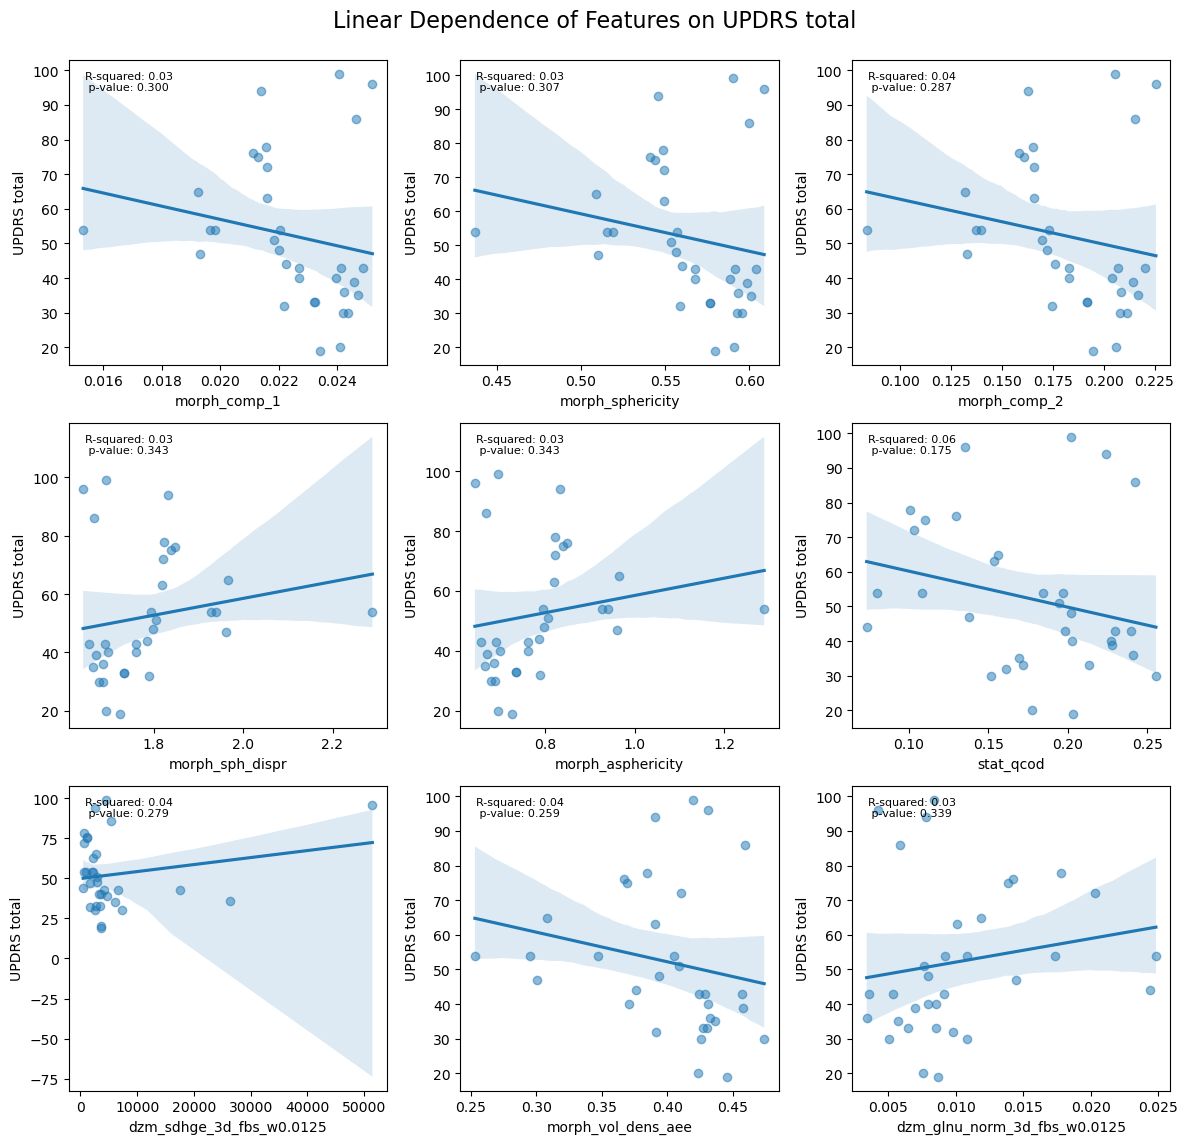

In [37]:
# Select the features and severity measure from the DataFrame - 
features = spearman_corr_df.columns[dict_top_k_features_info_gain[clinical_data.columns[6]][:-1]]
severity_measure = clinical_data.columns[6]
# Calculate the number of rows and columns for the subplots
n_features = len(features)
n_rows = (n_features + 2) // 3
n_cols = min(n_features, 3)

# Create a figure with the specified number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over the features and plot linear regression for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.regplot(x=feature, y=severity_measure, data=corr_dataset, ax=axes[i], scatter_kws={'alpha': 0.5})
    # Calculate R-squared value
    slope, intercept, r_value, p_value, std_err = stats.linregress(corr_dataset[feature], corr_dataset[severity_measure])
    r_squared = r_value**2
    
    # Annotate the plot with R-squared value and p-value
    text = f'R-squared: {r_squared:.2f}\n p-value: {p_value:.3f}'
    ax.text(0.05, 0.9, text, transform=ax.transAxes, fontsize=8)


# Remove any extra subplots if the number of features is less than 9
if n_features < n_rows * n_cols:
    for j in range(n_features, n_rows * n_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add title
plt.suptitle(f'Linear Dependence of Features on {severity_measure}', fontsize=16)

# Show the plot
plt.show()

In [38]:
dict_top_k_features_spearman

{'LEDD Total ': [105, 24, 79, 16, 23],
 'UPDRS I': [23, 24],
 'UPDRS II': [0, 1, 38, 39, 40, 41, 42, 52, 54, 55],
 'UPDRS III': [52, 48, 145, 17, 16, 54, 49, 51, 50, 55],
 'UPDRS IV': [79],
 'UPDRS total': [38, 39, 42, 40, 41, 16, 49, 52, 54, 55],
 'NMSQ': [4, 61, 31, 22, 21, 62, 5],
 'MMSE': [22, 75, 49, 17, 156, 23, 24],
 'MoCA': [47, 53, 49]}

In [39]:
dict_top_k_features_info_gain

{'LEDD Total ': array([ 99,  47,  43, 156, 150,  79,  23,  97, 140,   5]),
 'UPDRS I': array([ 63,  27,  55, 115, 168,   6,  49,  12,  70, 106]),
 'UPDRS II': array([51, 17, 39, 38, 55, 40, 42, 41, 30, 49]),
 'UPDRS III': array([ 78,  55,  52,  40,  42,  99,  54, 158,  41,  39]),
 'UPDRS IV': array([71, 13, 39, 32, 42, 40, 38, 41, 57, 73]),
 'UPDRS total': array([ 38,  41,  39,  40,  42,  17, 144,  52, 148, 132]),
 'NMSQ': array([129, 109, 157, 155, 111, 162,  91, 166,   7,  76]),
 'MMSE': array([51, 79,  1, 14, 87, 67,  0, 10, 72, 82]),
 'MoCA': array([176, 154, 144, 106, 175, 162, 113,  85, 109, 111])}

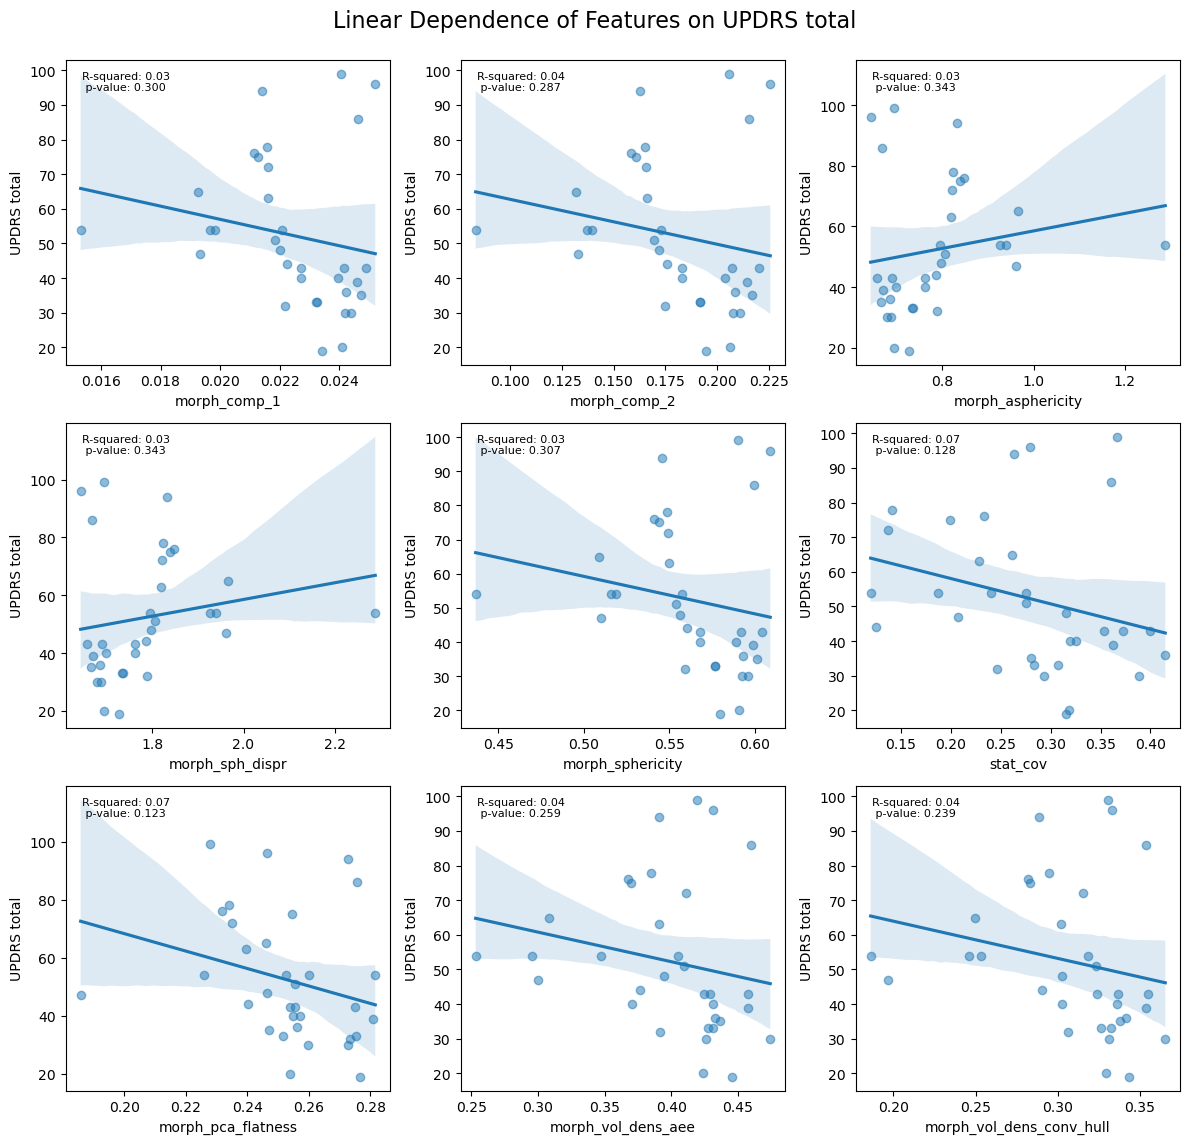

In [40]:
# Select the features and severity measure from the DataFrame - 
features = spearman_corr_df.columns[dict_top_k_features_spearman[clinical_data.columns[6]][:-1]]
severity_measure = clinical_data.columns[6]
# Calculate the number of rows and columns for the subplots
n_features = len(features)
n_rows = (n_features + 2) // 3
n_cols = min(n_features, 3)

# Create a figure with the specified number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over the features and plot linear regression for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.regplot(x=feature, y=severity_measure, data=corr_dataset, ax=axes[i], scatter_kws={'alpha': 0.5})
    # Calculate R-squared value
    slope, intercept, r_value, p_value, std_err = stats.linregress(corr_dataset[feature], corr_dataset[severity_measure])
    r_squared = r_value**2
    
    # Annotate the plot with R-squared value and p-value
    text = f'R-squared: {r_squared:.2f}\n p-value: {p_value:.3f}'
    ax.text(0.05, 0.9, text, transform=ax.transAxes, fontsize=8)


# Remove any extra subplots if the number of features is less than 9
if n_features < n_rows * n_cols:
    for j in range(n_features, n_rows * n_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add title
plt.suptitle(f'Linear Dependence of Features on {severity_measure}', fontsize=16)

# Show the plot
plt.show()

#### Analysis of subgroups based on UPDRS score

In [41]:
clinical_data.columns

Index(['id_subject', 'LEDD Total ', 'UPDRS I', 'UPDRS II', 'UPDRS III',
       'UPDRS IV', 'UPDRS total', 'NMSQ', 'MMSE', 'MoCA'],
      dtype='object')

In [42]:
# Define cutoff values for each part to determine mild, moderate or severe
part_cutoffs = {
    'UPDRS I': (10, 22),
    'UPDRS II': (12, 30),
    'UPDRS III': (32, 59),
    'UPDRS IV': (4, 13)
}

# Function to label part score as mild or severe
# We do not have any severe cases
def label_part_score(score, cutoff):
    if score <= cutoff[0]:
        return 0
    elif cutoff[0] < score < cutoff[1]:  
        return 1
    elif score >= cutoff[1]:  
        return 2

# Label each part as mild or severe in the DataFrame
for part, cutoff in part_cutoffs.items():
    clinical_data[f'{part} Label'] = clinical_data[part].apply(lambda x: label_part_score(x, cutoff))

# Calculate the joint score and label
clinical_data['Joint Score'] = clinical_data[['UPDRS I Label', 'UPDRS II Label', 'UPDRS III Label', 'UPDRS IV Label']].apply(
    lambda x: sum(x == 1), axis=1)

clinical_data['Joint Score Label'] = clinical_data['Joint Score'].apply(lambda x: 1 if x >= 2 else 0)

# Print the resulting DataFram
clinical_data.head()
corr_dataset['Group'] = clinical_data['Joint Score Label']


In [43]:
print(f"Split of the groups: {Counter(clinical_data['Joint Score Label'])}")

Split of the groups: Counter({0: 21, 1: 12})


In [44]:
rad_features = list(corr_dataset.columns[:-10])

# Split the radiomics data into two groups based on the severity labels
group1 = corr_dataset[corr_dataset['Group'] == 0]
group1 = group1.iloc[:, :-10].to_numpy()
group2 = corr_dataset[corr_dataset['Group'] == 1]
group2 = group2.iloc[:, :-10].to_numpy()

# Perform one-way ANOVA test
f_value, p_value = f_oneway(group1, group2)

# Create a dictionary to store the feature names and p-values
feature_p_values = {rad_features[i]: p_value[i] for i in range(len(rad_features))}

# Sort the features by p-value in ascending order
sorted_features = sorted(feature_p_values.items(), key=lambda x: x[1])

# Get the top 10 features with the lowest p-values
top_10_features = sorted_features[:10]

# Print the top 10 features and their p-values
for feature, p_val in top_10_features:
    print(f"Feature: {feature}, p-value: {round(p_val, 3)}")


Feature: dzm_ldlge_3d_fbs_w0.0125, p-value: 0.034
Feature: morph_sph_dispr, p-value: 0.039
Feature: morph_asphericity, p-value: 0.039
Feature: morph_sphericity, p-value: 0.04
Feature: morph_comp_1, p-value: 0.041
Feature: morph_comp_2, p-value: 0.044
Feature: cm_joint_max_d1_3d_avg_fbs_w0.0125, p-value: 0.045
Feature: cm_inv_diff_mom_norm_d1_3d_avg_fbs_w0.0125, p-value: 0.047
Feature: stat_cov, p-value: 0.047
Feature: cm_inv_diff_norm_d1_3d_avg_fbs_w0.0125, p-value: 0.055


/Users/diogjen/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [45]:
# List of feature names
feature_names = clinical_data.columns[1:10]

# Calculate mean and standard deviation for each feature in each group
group1_mean = np.mean(clinical_data[feature_names][clinical_data['Joint Score Label']==0], axis=0)
group1_std = np.std(clinical_data[feature_names][clinical_data['Joint Score Label']==0], axis=0)

group2_mean = np.mean(clinical_data[feature_names][clinical_data['Joint Score Label']==1], axis=0)
group2_std = np.std(clinical_data[feature_names][clinical_data['Joint Score Label']==1], axis=0)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Group 1 Mean': np.round(group1_mean, 3),
    'Group 1 Std': np.round(group1_std, 3),
    'Group 2 Mean': np.round(group2_mean, 3),
    'Group 2 Std': np.round(group2_std, 3)
})

results_df

,Feature,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std
LEDD Total,LEDD Total,444.095,292.853,733.208,335.736
UPDRS I,UPDRS I,7.048,3.735,11.667,5.006
UPDRS II,UPDRS II,6.095,3.477,14.833,2.911
UPDRS III,UPDRS III,25.190,8.466,43.250,10.779
UPDRS IV,UPDRS IV,1.333,2.570,4.500,3.640
UPDRS total,UPDRS total,39.762,11.836,74.250,16.016
NMSQ,NMSQ,6.619,3.722,10.083,3.402
MMSE,MMSE,29.381,0.898,29.250,1.010
MoCA,MoCA,27.619,2.058,26.500,2.217


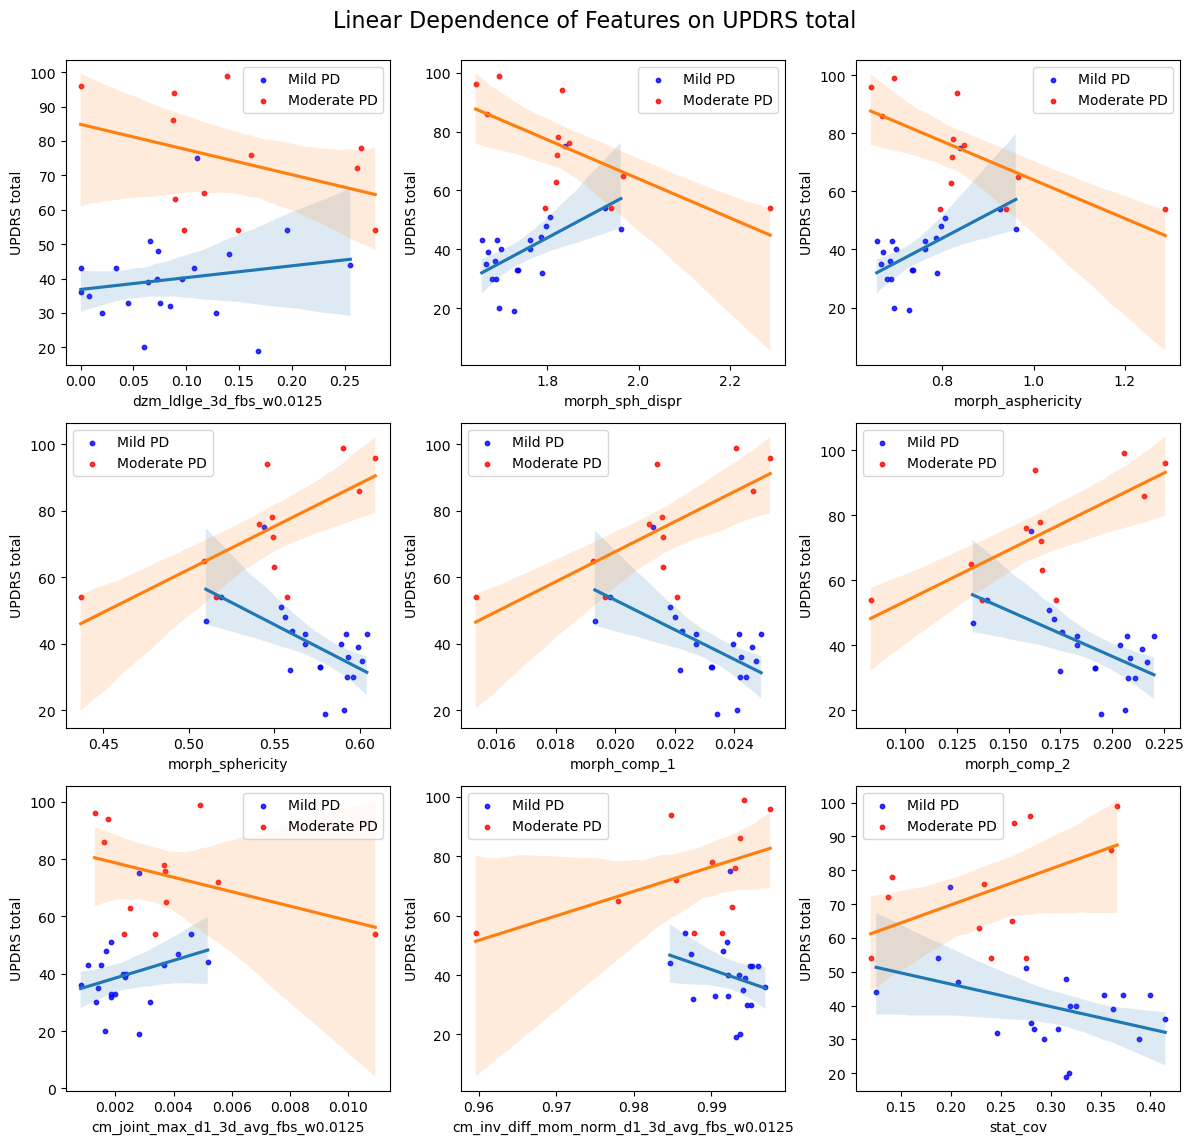

In [46]:
# Select the features and severity measure from the DataFrame 
first_elements = [t[0] for t in top_10_features]

# Groups 
group1 = corr_dataset[corr_dataset['Group'] == 0]
group2 = corr_dataset[corr_dataset['Group'] == 1]

features = first_elements[:-1]
severity_measure = clinical_data.columns[6]
# Calculate the number of rows and columns for the subplots
n_features = len(features)
n_rows = (n_features + 2) // 3
n_cols = min(n_features, 3)

# Create a figure with the specified number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over the features and plot linear regression for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.regplot(data=group1, x=feature, y=severity_measure,
                ax=axes[i],
                scatter_kws={'s': 10, 'color': 'blue'},
#                 line_kws={'color': 'lred'}, 
                label='Mild PD')
    
    sns.regplot(data=group2, x=feature, y=severity_measure, 
                ax=axes[i],
                scatter_kws={'s': 10, 'color': 'red'}, 
#                 line_kws={'color': 'lblue'}, 
                label='Moderate PD')
    ax.legend()

# Remove any extra subplots if the number of features is less than 9
if n_features < n_rows * n_cols:
    for j in range(n_features, n_rows * n_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Add title
plt.suptitle(f'Linear Dependence of Features on {severity_measure}', fontsize=16)

# Show the plot
plt.show()

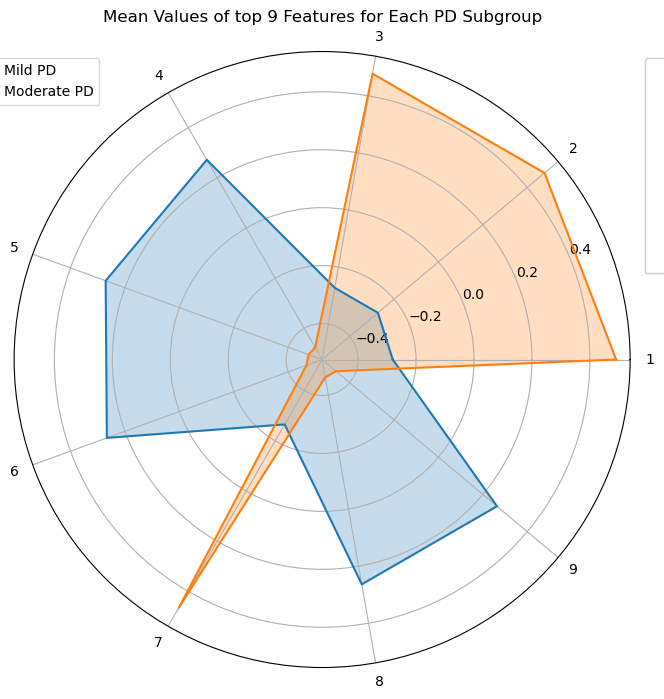

In [50]:
# Create a list of feature names
feature_names = first_elements[:-1]
severity_measure = clinical_data.columns[6]

group1 = corr_dataset[corr_dataset['Group'] == 0]
group1 = group1.loc[:, feature_names].to_numpy()
group2 = corr_dataset[corr_dataset['Group'] == 1]
group2 = group2.loc[:, feature_names].to_numpy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.concatenate((group1, group2), axis=0))
group1 = scaled_data[:group1.shape[0], :]
group2 = scaled_data[group1.shape[0]:, :]

# Data for Group 1 and Group 2 (mean values of 9 features)
group1_means = np.mean(group1, axis=0)
group2_means = np.mean(group2, axis=0)

# Number of features
num_features = len(group1_means)

# Create an evenly spaced array of angles for the radar chart
theta = np.linspace(0, 2*np.pi, num_features, endpoint=False)

# Close the plot by appending the starting angle at the end
theta = np.append(theta, theta[0])

# Concatenate the mean values of both groups to close the plot
group1_means = np.append(group1_means, group1_means[0])
group2_means = np.append(group2_means, group2_means[0])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the radar chart for Group 1
group1_line, = ax.plot(theta, group1_means, label='Mild PD')
group1_fill = ax.fill(theta, group1_means, alpha=0.25)

# Plot the radar chart for Group 2
group2_line, = ax.plot(theta, group2_means, label='Moderate PD')
group2_fill = ax.fill(theta, group2_means, alpha=0.25)

# Set the labels for each feature
feature_numbers = [str(i+1) for i in range(num_features)]
ax.set_xticks(theta[:-1])
ax.set_xticklabels(feature_numbers)

# Create the legend for group colors
legend1 = ax.legend(handles=[group1_line, group2_line], labels=['Mild PD', 'Moderate PD'], loc='upper left')
legend1.set_bbox_to_anchor((-0.1, 1))  # Adjust the anchor coordinates as needed


feature_names = [f'{i+1}: {feature_names[i]}' for i in range(len(feature_names))]
# Create the legend for feature names using proxy artists
feature_patches = [mpatches.Patch(color='white', label=name) for name in feature_names]
legend2 = ax.legend(handles=feature_patches, title='Feature Labels', loc='upper right')
legend2.set_bbox_to_anchor((1.7, 1))  # Adjust the anchor coordinates as needed

# Add the legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

# Set the title
ax.set_title('Mean Values of top 9 Features for Each PD Subgroup')

# Display the plot
plt.show()


## PART 2 - Individual Prediction

### Are the radiomics features capable to distinguish patients from controls?

### Model 1: SVM-RFE (for feature selection) and Random Forest with K-fold

In [84]:
xlsx = pd.ExcelFile('data/Homework_Dataset.xlsx')

radiomics_df = pd.read_excel(xlsx, 'Radiomics')

# Extract the patient IDs and labels
patient_ids = radiomics_df.iloc[:, 0].values
labels = np.array([1 if i < 33 else 0 for i in range(len(patient_ids))]) #since the first 33 are PD and the rest are healthy controls

# Normalize the features
scaler = StandardScaler()
data = scaler.fit_transform(radiomics_df.iloc[:, 1:].values)

# Split the dataset into training and test sets (0.8 vs 0.2)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

# SVM-RFE for feature selection
estimator = SVC(kernel='linear')
selector = RFE(estimator, n_features_to_select=10)
selector.fit(X_train, y_train)
important_features = np.where(selector.support_)[0]
print(f'Number of selected features: {len(important_features)}')

# Reduce the dataset to the selected features
X_train_reduced = X_train[:, important_features]
X_test_reduced = X_test[:, important_features]

# Random Forest with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_reduced, y_train):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold)
    y_prob_val = clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_reduced)
y_prob_test = clf.predict_proba(X_test_reduced)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use #(visualisation)
sensitivities_rfe_random_forest = test_sensitivity
auc_rfe_random_forest = test_auc

Number of selected features: 10
Average accuracy: 0.97
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.91
Test sensitivity: 0.83
Test AUC: 1.00


### Model 2: SVM-RFE (for feature selection) and MKL SVM with K-fold

In [85]:
import os
os.environ['USE_DAAL'] = 'TRUE'
import sklearn
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# SVM-RFE for feature selection
estimator = SVC(kernel='linear')
selector = RFE(estimator, n_features_to_select=10)
selector.fit(X_train, y_train)
important_features = np.where(selector.support_)[0]
print(f'Number of selected features: {len(important_features)}')

X_train_reduced = X_train[:, important_features]
X_test_reduced = X_test[:, important_features]

# MKL SVM with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_reduced, y_train):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train an SVM classifier
    clf1 = SVC(kernel='linear', probability=True)
    clf2 = SVC(kernel='rbf', probability=True)
    clf3 = SVC(kernel='poly', probability=True)

    voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
    voting_clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = voting_clf.predict(X_val_fold)
    y_prob_val = voting_clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf1 = SVC(kernel='linear', probability=True)
clf2 = SVC(kernel='rbf', probability=True)
clf3 = SVC(kernel='poly', probability=True)

voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
voting_clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_test = voting_clf.predict(X_test_reduced)
y_prob_test = voting_clf.predict_proba(X_test_reduced)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use
sensitivities_rfe_mkl_svm = test_sensitivity
auc_rfe_mkl_svm = test_auc


Number of selected features: 10
Average accuracy: 1.00
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.89
Test sensitivity: 0.89
Test AUC: 0.96


### Model 3: SVM-RFE and Logistic Regression with K-fold

In [86]:
# Split the dataset into training and test sets (0.8 vs 0.2)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

# SVM-RFE for feature selection
estimator = SVC(kernel='linear')
selector = RFE(estimator, n_features_to_select=10)
selector.fit(X_train, y_train)
important_features = np.where(selector.support_)[0]
print(f'Number of selected features: {len(important_features)}')

# Reduce the dataset to the selected features
X_train_reduced = X_train[:, important_features]
X_test_reduced = X_test[:, important_features]

# Logistic Regression with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_reduced, y_train):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train a Logistic Regression classifier
    clf = LogisticRegression(solver='liblinear', random_state=0)
    clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold)
    y_prob_val = clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf = LogisticRegression(solver='liblinear', random_state=0)
clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_reduced)
y_prob_test = clf.predict_proba(X_test_reduced)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use #(visualisation)
sensitivities_rfe_logistic_regression = test_sensitivity
auc_rfe_logistic_regression = test_auc

Number of selected features: 10
Average accuracy: 1.00
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.91
Test sensitivity: 0.83
Test AUC: 1.00


### Model 4: Lasso + Random Forest with K-fold Cross-Validation

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

# Apply LASSO for feature selection
lasso = LassoCV().fit(X_train, y_train)
important_features = np.where(lasso.coef_ != 0)[0]
print(f'Number of selected features: {len(important_features)}')

# Reduce the dataset to the selected features
X_train_reduced = X_train[:, important_features]
X_test_reduced = X_test[:, important_features]

# Stratified K-fold cross-validation for Random Forest
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_reduced, y_train):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold)
    y_prob_val = clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_reduced)
y_prob_test = clf.predict_proba(X_test_reduced)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')


# Store metrics for future use
sensitivities_lasso_random_forest = test_sensitivity
auc_lasso_random_forest = test_auc

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.697e-04, tolerance: 6.545e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.764e-04, tolerance: 6.545e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e-03, tolerance: 7.765e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.994e-04, tolerance: 7.765e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Number of selected features: 12
Average accuracy: 0.97
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.91
Test sensitivity: 0.83
Test AUC: 1.00


### Model 5: Lasso + MKL SVM with K-fold Cross-Validation

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

# Apply LASSO for feature selection
lasso = LassoCV().fit(X_train, y_train)
important_features = np.where(lasso.coef_ != 0)[0]
print(f'Number of selected features: {len(important_features)}')

# Reduce the dataset to the selected features
X_train_reduced = X_train[:, important_features]
X_test_reduced = X_test[:, important_features]

# Stratified K-fold cross-validation for MKL SVM
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_reduced, y_train):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

     # Train an SVM classifier
    clf1 = SVC(kernel='linear', probability=True)
    clf2 = SVC(kernel='rbf', probability=True)
    clf3 = SVC(kernel='poly', probability=True)

    voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
    voting_clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = voting_clf.predict(X_val_fold)
    y_prob_val = voting_clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf1 = SVC(kernel='linear', probability=True)
clf2 = SVC(kernel='rbf', probability=True)
clf3 = SVC(kernel='poly', probability=True)

voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
voting_clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_test = voting_clf.predict(X_test_reduced)
y_prob_test = voting_clf.predict_proba(X_test_reduced)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use
sensitivities_lasso_mkl_svm = test_sensitivity
auc_lasso_mkl_svm = test_auc

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.697e-04, tolerance: 6.545e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.764e-04, tolerance: 6.545e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.436e-04, tolerance: 8.235e-04
  model = cd_fast.enet_coordinate_descent(


Number of selected features: 12
Average accuracy: 1.00
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.91
Test sensitivity: 0.83
Test AUC: 1.00


/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e-03, tolerance: 8.029e-04
  model = cd_fast.enet_coordinate_descent(


### Model 6: Lasso + Logistic Regression with K-fold Cross-Validation

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

# Apply LASSO for feature selection
lasso = LassoCV().fit(X_train, y_train)
important_features = np.where(lasso.coef_ != 0)[0]
print(f'Number of selected features: {len(important_features)}')

# Reduce the dataset to the selected features
X_train_reduced = X_train[:, important_features]
X_test_reduced = X_test[:, important_features]

# Stratified K-fold cross-validation for Random Forest
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_reduced, y_train):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train Logistic Regression  classifier
    clf = LogisticRegression(solver='liblinear', random_state=0)
    clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold)
    y_prob_val = clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf = LogisticRegression(solver='liblinear', random_state=0)
clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_reduced)
y_prob_test = clf.predict_proba(X_test_reduced)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use
sensitivities_lasso_logistic_regression = test_sensitivity
auc_lasso_logistic_regression = test_auc

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.697e-04, tolerance: 6.545e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.764e-04, tolerance: 6.545e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.994e-04, tolerance: 7.765e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.851e-04, tolerance: 7.765e-04
  model = cd_fast.enet_coordinate_descent(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Number of selected features: 12
Average accuracy: 1.00
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.91
Test sensitivity: 0.83
Test AUC: 1.00


/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e-03, tolerance: 8.029e-04
  model = cd_fast.enet_coordinate_descent(


### Model 7: PCA + MKL SVM with K-fold Cross-Validation

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# MKL SVM with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_reduced, y_train):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

 # Train an SVM classifier
    clf1 = SVC(kernel='linear', probability=True)
    clf2 = SVC(kernel='rbf', probability=True)
    clf3 = SVC(kernel='poly', probability=True)

    voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
    voting_clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = voting_clf.predict(X_val_fold)
    y_prob_val = voting_clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf1 = SVC(kernel='linear', probability=True)
clf2 = SVC(kernel='rbf', probability=True)
clf3 = SVC(kernel='poly', probability=True)

voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
voting_clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_test = voting_clf.predict(X_test_reduced)
y_prob_test = voting_clf.predict_proba(X_test_reduced)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')


# Store metrics for future use
sensitivities_pca_mkl_svm = test_sensitivity
auc_pca_mkl_svm = test_auc

Average accuracy: 0.97
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.83
Test sensitivity: 1.00
Test AUC: 1.00


### Model 8: PCA (Principal Component Analysis) + Random Forest with K-fold cross-validation

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# Random Forest with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Apply PCA for feature extraction
    pca = PCA(n_components=10)
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold_pca, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold_pca)
    y_prob_val = clf.predict_proba(X_val_fold_pca)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Apply PCA to the entire training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_pca)
y_prob_test = clf.predict_proba(X_test_pca)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use
sensitivities_pca_random_forest = test_sensitivity

Average accuracy: 0.94
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 1.00
Test sensitivity: 1.00
Test AUC: 1.00


### Model 9: PCA + Logistic Regression with K-fold Cross-Validation

In [103]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# Logistic Regression with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Apply PCA for feature extraction
    pca = PCA(n_components=10)
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train Logistic Regression classifier
    clf = LogisticRegression(solver='liblinear', random_state=0)
    clf.fit(X_train_fold_pca, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold_pca)
    y_prob_val = clf.predict_proba(X_val_fold_pca)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Apply PCA to the entire training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the final model on the entire training set
clf = LogisticRegression(solver='liblinear', random_state=0)
clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_pca)
y_prob_test = clf.predict_proba(X_test_pca)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use
sensitivities_pca_logistic_regression = test_sensitivity
auc_pca_logistic_regression = test_auc

Average accuracy: 0.94
Average sensitivity: 0.92
Average AUC: 1.00
Test accuracy: 0.94
Test sensitivity: 0.89
Test AUC: 1.00


### Plot: Sensitivity of Different Approaches

/var/folders/zk/9vvknt8s4f3cfymmhds2d_wc0000gn/T/ipykernel_2500/1485676624.py:37: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


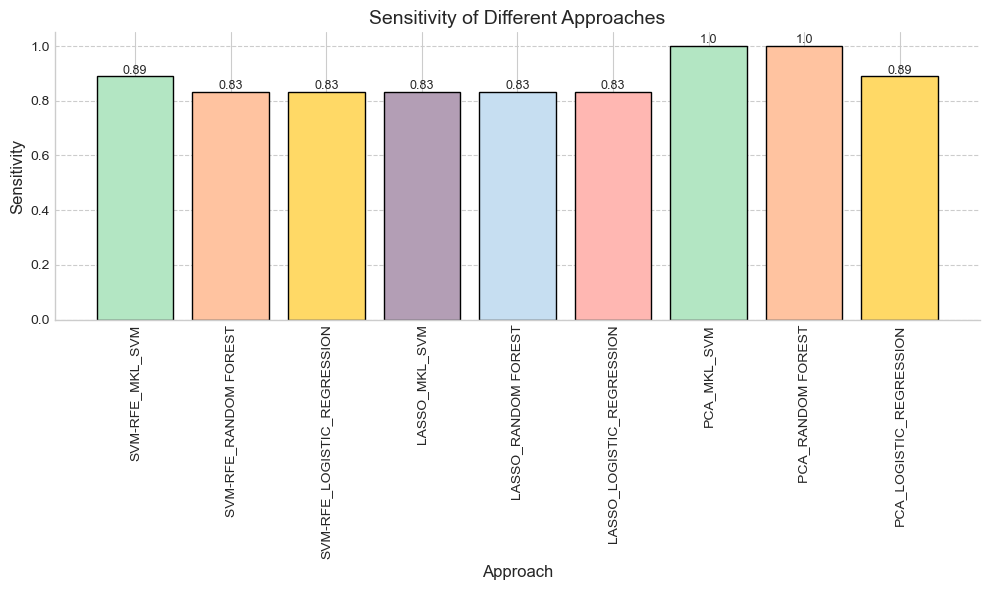

In [104]:
# Sensitivities for each approach
approach_sensitivities = {
    'SVM-RFE_MKL_SVM': sensitivities_rfe_mkl_svm,
    'SVM-RFE_RANDOM FOREST': sensitivities_rfe_random_forest,
    'SVM-RFE_LOGISTIC_REGRESSION': sensitivities_rfe_logistic_regression,
    'LASSO_MKL_SVM': sensitivities_lasso_mkl_svm,
    'LASSO_RANDOM FOREST': sensitivities_lasso_random_forest,
    'LASSO_LOGISTIC_REGRESSION': sensitivities_lasso_logistic_regression,
    'PCA_MKL_SVM': sensitivities_pca_mkl_svm,
    'PCA_RANDOM FOREST': sensitivities_pca_random_forest, 
    'PCA_LOGISTIC_REGRESSION': sensitivities_pca_logistic_regression
}

# Define pastel colors for each approach
pastel_colors = ['#B3E6C3', '#FFC3A0', '#FFD966', '#B39EB5', '#C6DEF1', '#FFB7B2']

# Plot the sensitivities
approach_names = list(approach_sensitivities.keys())
sensitivities = [np.mean(approach_sensitivities[approach]) for approach in approach_names]

plt.figure(figsize=(10, 6))
plt.bar(approach_names, sensitivities, color=pastel_colors, edgecolor='black', linewidth=1)
plt.xlabel('Approach', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.title('Sensitivity of Different Approaches', fontsize=14)
plt.xticks(rotation='vertical', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')

# Add data labels above each bar
for i, v in enumerate(sensitivities):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', fontsize=9)

plt.tight_layout()

# Customize the plot style
plt.style.use('seaborn-whitegrid')

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the axis labels' font size
plt.xlabel('Approach', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)

plt.show()

###  Plot: ROC Curve - PCA + Random Forest

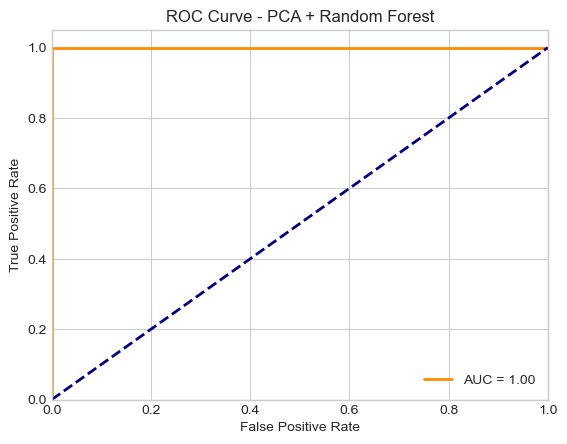

In [105]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - PCA + Random Forest')
plt.legend(loc='lower right')
plt.show()

# Sensitivity Analysis

## Part 1: Outliers

In [106]:
# Extract the patient IDs and labels
patient_ids = radiomics_df.iloc[:, 0].values
labels = np.array([1 if i < 33 else 0 for i in range(len(patient_ids))])

# Extract the features without normalization
data = radiomics_df.iloc[:, 1:].values
z_threshold = 3 

# Calculate the z-scores for each feature in the data
z_scores = np.abs((data - data.mean()) / data.std())

# Determine the rows that contain at least one outlier based on the z-scores
outliers = (z_scores > z_threshold).any(axis=1)

# Print the patient IDs and labels of the outliers
outlier_patient_ids = patient_ids[outliers]
outlier_labels = labels[outliers]

print("Outliers:")
for patient_id, label in zip(outlier_patient_ids, outlier_labels):
    print("Patient ID:", patient_id, "Label:", label)

# Count the number of outliers that are patients and healthy controls
patient_outliers = np.sum(outliers[labels == 1])
healthy_outliers = np.sum(outliers[labels == 0])

print("Number of patient outliers:", patient_outliers)
print("Number of healthy control outliers:", healthy_outliers)

Outliers:
Patient ID: ID_14 Label: 1
Patient ID: ID_17 Label: 1
Patient ID: ID_33 Label: 1
Patient ID: ID_37 Label: 0
Patient ID: ID_38 Label: 0
Patient ID: ID_45 Label: 0
Patient ID: ID_47 Label: 0
Patient ID: ID_48 Label: 0
Patient ID: ID_49 Label: 0
Patient ID: ID_50 Label: 0
Patient ID: ID_52 Label: 0
Patient ID: ID_53 Label: 0
Number of patient outliers: 3
Number of healthy control outliers: 9


### 1.1. Sensitivity Analysis using PCA and Random Forest with Outliers


In [107]:
# Normalize the features
scaler = StandardScaler()
data = scaler.fit_transform(radiomics_df.iloc[:, 1:].values)

# Split the data into training and test sets, including outliers
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# Random Forest with K-fold cross-validation
k = 9
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Apply PCA for feature extraction
    pca = PCA(n_components=10)
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold_pca, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold_pca)
    y_prob_val = clf.predict_proba(X_val_fold_pca)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Apply PCA to the entire training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_pca)
y_prob_test = clf.predict_proba(X_test_pca)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

sensitivities_pca_random_forest_with_outliers = test_sensitivity

Average accuracy: 0.97
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 1.00
Test sensitivity: 1.00
Test AUC: 1.00


### 1.2. Sensitivity Analysis using PCA and Random Forest without Outliers


In [108]:
# Remove outliers using Z-Score method
z_scores = np.abs(stats.zscore(data))
threshold = 3
outlier_indices = np.unique(np.where(z_scores > threshold)[0])
data_no_outliers = np.delete(data, outlier_indices, axis=0)
labels_no_outliers = np.delete(labels, outlier_indices)

# Normalize the features
scaler = StandardScaler()
data_no_outliers = scaler.fit_transform(data_no_outliers)

X_train, X_test, y_train, y_test = train_test_split(data_no_outliers, labels_no_outliers, test_size=0.33, random_state=1)

# Random Forest with K-fold cross-validation
k = 9
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Apply PCA for feature extraction
    pca = PCA(n_components=10)
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold_pca, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold_pca)
    y_prob_val = clf.predict_proba(X_val_fold_pca)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Apply PCA to the entire training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_pca)
y_prob_test = clf.predict_proba(X_test_pca)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use
sensitivities_pca_random_forest_without_outliers = test_sensitivity

Average accuracy: 0.93
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.92
Test sensitivity: 0.80
Test AUC: 0.97


### Plot: Sensitivity for each approach, with and without outliers

/var/folders/zk/9vvknt8s4f3cfymmhds2d_wc0000gn/T/ipykernel_2500/1570871056.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


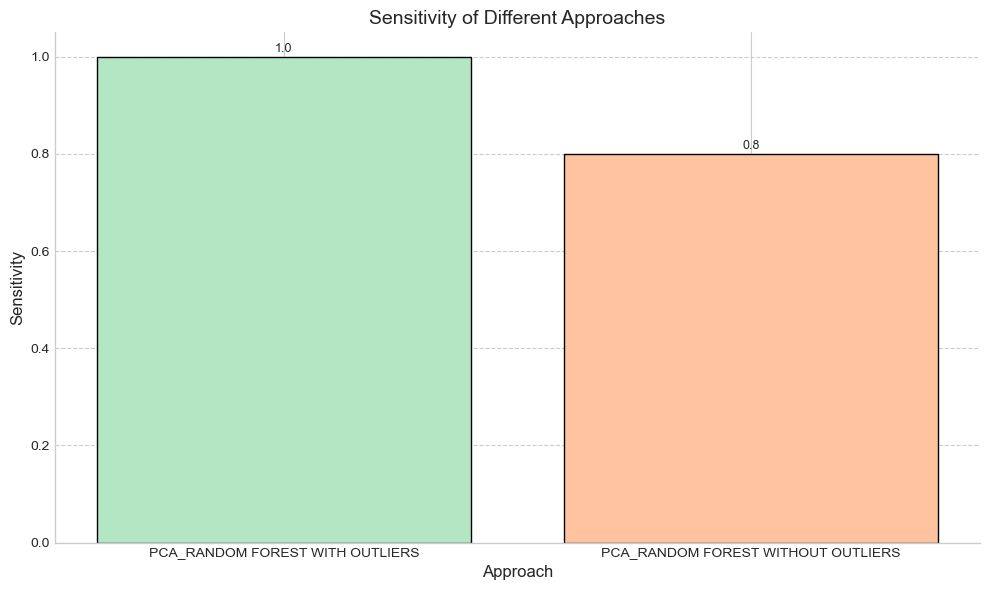

In [109]:
# Sensitivities for each approach
approach_sensitivities = {
    'PCA_RANDOM FOREST WITH OUTLIERS': sensitivities_pca_random_forest_with_outliers,
    'PCA_RANDOM FOREST WITHOUT OUTLIERS': sensitivities_pca_random_forest_without_outliers
}

# Define pastel colors for each approach
pastel_colors = ['#B3E6C3', '#FFC3A0', '#FFD966', '#B39EB5', '#C6DEF1', '#FFB7B2']

# Plot the sensitivities
approach_names = list(approach_sensitivities.keys())
sensitivities = [np.mean(approach_sensitivities[approach]) for approach in approach_names]

plt.figure(figsize=(10, 6))
plt.bar(approach_names, sensitivities, color=pastel_colors, edgecolor='black', linewidth=1)
plt.xlabel('Approach', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.title('Sensitivity of Different Approaches', fontsize=14)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')

# Add data labels above each bar
for i, v in enumerate(sensitivities):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', fontsize=9)

plt.tight_layout()

plt.style.use('seaborn-whitegrid')

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the axis labels' font size
plt.xlabel('Approach', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)

plt.show()

## Part 2: Imbalaced Data

### 2.1. PCA (Principal Component Analysis) + Random Forest with K-fold cross-validation before applying any class imbalance dealing technique

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# Random Forest with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Apply PCA for feature extraction
    pca = PCA(n_components=10)
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold_pca, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold_pca)
    y_prob_val = clf.predict_proba(X_val_fold_pca)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Apply PCA to the entire training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_pca)
y_prob_test = clf.predict_proba(X_test_pca)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
test_specificity = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')


# Store metrics for future use
sensitivities_pca_random_forest = test_sensitivity

Average accuracy: 0.94
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 1.00
Test sensitivity: 1.00
Test AUC: 1.00


### 2.2. PCA (Principal Component Analysis) + Random Forest with K-fold cross-validation after applying SMOTE

In [111]:

patient_ids = radiomics_df.iloc[:, 0].values
labels = np.array([1] * 33 + [0] * 20)

# Normalize the features
scaler = StandardScaler()
data = scaler.fit_transform(radiomics_df.iloc[:, 1:].values)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='auto', random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the number of samples for each class after applying SMOTE
print("Number of samples for each class after applying SMOTE:")
print(Counter(y_train_smote))

# Random Forest with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[test_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[test_index]

    # Apply PCA for feature extraction
    pca = PCA(n_components=10)
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold_pca, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold_pca)
    y_prob_val = clf.predict_proba(X_val_fold_pca)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Apply PCA to the entire training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train_smote)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_pca)
y_prob_test = clf.predict_proba(X_test_pca)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
test_specificity = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Store metrics for future use
sensitivities_pca_random_forest = test_sensitivity

Number of samples for each class after applying SMOTE:
Counter({0: 24, 1: 24})
Average accuracy: 0.98
Average sensitivity: 0.97
Average AUC: 1.00
Test accuracy: 1.00
Test sensitivity: 1.00
Test AUC: 1.00


### 2.3. PCA (Principal Component Analysis) + Random Forest with K-fold cross-validation after applying oversampling and undersampling technique


In [112]:
# Normalize the features
scaler = StandardScaler()
data = scaler.fit_transform(radiomics_df.iloc[:, 1:].values)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=1)

# Apply undersampling to the training set
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=1)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Apply oversampling to the training set
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=1)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Print the number of samples for each class after applying undersampling and oversampling
print("Number of samples for each class after applying undersampling:")
print(Counter(y_train_undersampled))

print("Number of samples for each class after applying oversampling:")
print(Counter(y_train_oversampled))

# Random Forest with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train_undersampled, y_train_undersampled):
    X_train_fold, X_val_fold = X_train_undersampled[train_index], X_train_undersampled[test_index]
    y_train_fold, y_val_fold = y_train_undersampled[train_index], y_train_undersampled[test_index]

    # Apply PCA for feature extraction
    pca = PCA(n_components=10)
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_fold_pca, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_fold_pca)
    y_prob_val = clf.predict_proba(X_val_fold_pca)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Apply PCA to the entire training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_undersampled)
X_test_pca = pca.transform(X_test)

# Train the final model on the entire training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca, y_train_undersampled)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_pca)
y_prob_test = clf.predict_proba(X_test_pca)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
test_specificity = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.2f}')
print(f'Average sensitivity: {average_sensitivity:.2f}')
print(f'Average AUC: {average_auc:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test sensitivity: {test_sensitivity:.2f}')
print(f'Test AUC: {test_auc:.2f}')


# Store metrics for future use
sensitivities_pca_random_forest = test_sensitivity

Number of samples for each class after applying undersampling:
Counter({0: 11, 1: 11})
Number of samples for each class after applying oversampling:
Counter({0: 24, 1: 24})
Average accuracy: 0.95
Average sensitivity: 1.00
Average AUC: 1.00
Test accuracy: 0.89
Test sensitivity: 0.78
Test AUC: 0.96


## Part 3: Group Matching

### 3.1.  Sensitivity Analysis based on Gender-based Subgroups  using PCA and Random Forest


In [113]:
radiomics_df = pd.read_excel(xlsx, sheet_name='Radiomics')
demographics_df = pd.read_excel(xlsx, sheet_name='Demographics Clinical')
# Merge the datasets based on the common identifier column (id_subject)
merged_df = pd.merge(radiomics_df, demographics_df, on='id_subject')

# Extract features and labels from the merged dataset
features = merged_df.iloc[:, 1:-7].values  # Exclude id_subject and demographic columns
labels = merged_df['Group (1=PD, 0 = Controls)'].values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities_male = []
specificities_male = []
aucs_male = []
sensitivities_female = []
specificities_female = []
aucs_female = []

for train_index, test_index in skf.split(scaled_features, labels):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Identify subgroups based on demographic variables (e.g., gender)
    male_indices = np.where(merged_df['Gender (M=0, F=1)'] == 0)[0]
    female_indices = np.where(merged_df['Gender (M=0, F=1)'] == 1)[0]

    # Perform PCA for feature selection within each subgroup if samples exist
    if len(male_indices) > 0:
        pca_male = PCA(n_components=10)  # Adjust the number of components as needed
        X_train_male = X_train[np.isin(train_index, male_indices)]
        X_test_male = X_test[np.isin(test_index, male_indices)]
        
        if X_train_male.shape[0] > 0 and X_test_male.shape[0] > 0:
            X_train_male_reduced = pca_male.fit_transform(X_train_male)
            X_test_male_reduced = pca_male.transform(X_test_male)

            # Train and evaluate the model for male patients
            clf_male = RandomForestClassifier(n_estimators=100)
            clf_male.fit(X_train_male_reduced, y_train[np.isin(train_index, male_indices)])
            y_pred_male = clf_male.predict(X_test_male_reduced)

            accuracy_male = accuracy_score(y_test[np.isin(test_index, male_indices)], y_pred_male)
            confusion_male = confusion_matrix(y_test[np.isin(test_index, male_indices)], y_pred_male)
            
            if confusion_male.size > 1:
                tn_male, fp_male, fn_male, tp_male = confusion_male.ravel()
                sensitivity_male = tp_male / (tp_male + fn_male)
                specificity_male = tn_male / (tn_male + fp_male)
            else:
                tn_male, fp_male, fn_male, tp_male = 0, 0, 0, 0
                sensitivity_male, specificity_male = 0.0, 0.0

            fpr_male, tpr_male, _ = roc_curve(y_test[np.isin(test_index, male_indices)], y_pred_male)
            auc_male = auc(fpr_male, tpr_male)

            # Store the results for male patients
            accuracies.append(accuracy_male)
            sensitivities_male.append(sensitivity_male)
            specificities_male.append(specificity_male)
            aucs_male.append(auc_male)
            
    if len(female_indices) > 0:
        pca_female = PCA(n_components=10)  # Adjust the number of components as needed
        X_train_female = X_train[np.isin(train_index, female_indices)]
        X_test_female = X_test[np.isin(test_index, female_indices)]

        if X_train_female.shape[0] > 0 and X_test_female.shape[0] > 0:
            X_train_female_reduced = pca_female.fit_transform(X_train_female)
            X_test_female_reduced = pca_female.transform(X_test_female)

            # Train and evaluate the model for female patients
            clf_female = RandomForestClassifier(n_estimators=100)
            clf_female.fit(X_train_female_reduced, y_train[np.isin(train_index, female_indices)])
            y_pred_female = clf_female.predict(X_test_female_reduced)

            accuracy_female = accuracy_score(y_test[np.isin(test_index, female_indices)], y_pred_female)
            confusion_female = confusion_matrix(y_test[np.isin(test_index, female_indices)], y_pred_female)
            
            if confusion_female.size > 1:
                tn_female, fp_female, fn_female, tp_female = confusion_female.ravel()
                sensitivity_female = tp_female / (tp_female + fn_female)
                specificity_female = tn_female / (tn_female + fp_female)
            else:
                tn_female, fp_female, fn_female, tp_female = 0, 0, 0, 0
                sensitivity_female, specificity_female = 0.0, 0.0

            fpr_female, tpr_female, _ = roc_curve(y_test[np.isin(test_index, female_indices)], y_pred_female)
            auc_female = auc(fpr_female, tpr_female)

            # Store the results for female patients
            accuracies.append(accuracy_female)
            sensitivities_female.append(sensitivity_female)
            specificities_female.append(specificity_female)
            aucs_female.append(auc_female)

# Compute and print the average performance metrics across all folds
print("Average Accuracy (Male):", round(np.mean(accuracies), 2))
print("Average Sensitivity (Male):", round(np.mean(sensitivities_male), 2))
print("Average Specificity (Male):", round(np.mean(specificities_male), 2))
print("Average Accuracy (Female):", round(np.mean(accuracies), 2))
print("Average Sensitivity (Female):", round(np.mean(sensitivities_female), 2))
print("Average Specificity (Female):", round(np.mean(specificities_female), 2))

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/var/folders/zk/9vvknt8s4f3cfymmhds2d_wc0000gn/T/ipykernel_2500/618614892.py:53: RuntimeWarning: invalid value encountered in long_scalars
  specificity_male = tn_male / (tn_male + fp_male)
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn

Average Accuracy (Male): 0.94
Average Sensitivity (Male): 0.97
Average Specificity (Male): nan
Average Accuracy (Female): 0.94
Average Sensitivity (Female): 0.44
Average Specificity (Female): 0.28


### Sensitivity Analysis by Gender using Bar Plot

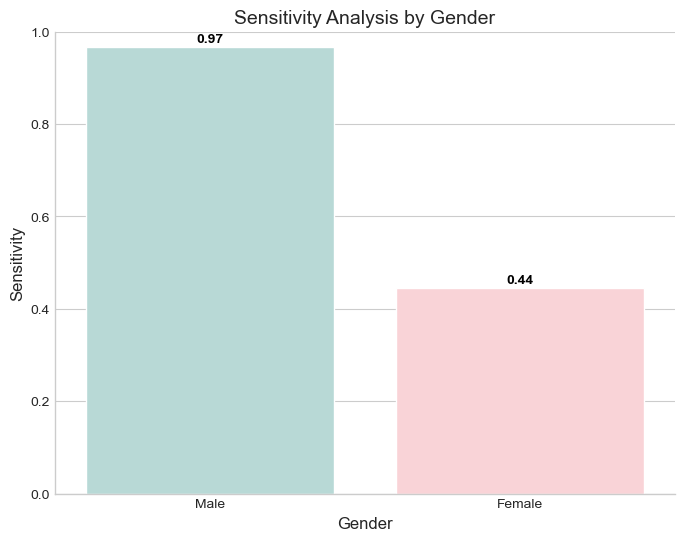

In [114]:
# Define the pastel colors for the plot
colors = ['#B2DFDB', '#FFCDD2']

# Calculate the average sensitivity values for males and females
avg_sensitivity_male = np.mean(sensitivities_male)
avg_sensitivity_female = np.mean(sensitivities_female)

# Create a figure with a grid plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")

# Plot the sensitivity values as a bar plot
sns.barplot(x=['Male', 'Female'], y=[avg_sensitivity_male, avg_sensitivity_female], palette=colors, ax=ax)

# Add the average sensitivity values as text on top of the bars
for i, v in enumerate([avg_sensitivity_male, avg_sensitivity_female]):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', color='black', fontweight='bold')

# Set the plot title and labels
ax.set_title('Sensitivity Analysis by Gender', fontsize=14)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Sensitivity', fontsize=12)

# Set the y-axis limits from 0 to 1
ax.set_ylim(0, 1)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

### 3.2. Sensitivity Analysis Based on Age Subgroups using PCA and Random Forest

In [115]:
# Split the data into old and young subgroups based on the Age column in Demographics Clinical
age_threshold = 65  # Define the age threshold for old vs. young
old_ids = demographics_df[demographics_df['Age'] >= age_threshold]['id_subject'].values
young_ids = demographics_df[demographics_df['Age'] < age_threshold]['id_subject'].values

old_data = data[np.isin(patient_ids, old_ids)]
old_labels = labels[np.isin(patient_ids, old_ids)]

young_data = data[np.isin(patient_ids, young_ids)]
young_labels = labels[np.isin(patient_ids, young_ids)]

# Perform subgroup analysis using PCA and Random Forest for the old subgroup
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

old_accuracies = []
old_sensitivities = []
old_specificities = []
old_aucs = []

for train_index, test_index in skf.split(old_data, old_labels):
    X_train, X_test = old_data[train_index], old_data[test_index]
    y_train, y_test = old_labels[train_index], old_labels[test_index]

    # Apply PCA for feature reduction
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_pca)
    try:
        y_prob = clf.predict_proba(X_test_pca)[:, 1]
    except IndexError:
        # Handle the case when there is only one class present in the training data
        y_prob = clf.predict_proba(X_test_pca)[:, 0]

    # Compute metrics for old subgroup
    old_accuracies.append(accuracy_score(y_test, y_pred))
    unique_classes = np.unique(y_test)
    if len(unique_classes) == 2:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        old_sensitivities.append(tp / (tp + fn))
        old_specificities.append(tn / (tn + fp))
    else:
        # Handle the case when there is only one class present in the test data
        old_sensitivities.append(1.0)
        old_specificities.append(1.0)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    old_aucs.append(auc(fpr, tpr))

# Perform subgroup analysis using PCA and Random Forest for the young subgroup
young_accuracies = []
young_sensitivities = []
young_specificities = []
young_aucs = []

for train_index, test_index in skf.split(young_data, young_labels):
    X_train, X_test = young_data[train_index], young_data[test_index]
    y_train, y_test = young_labels[train_index], young_labels[test_index]

    # Apply PCA for feature reduction
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_pca)
    try:
        y_prob = clf.predict_proba(X_test_pca)[:, 1]
    except IndexError:
        # Handle the case when there is only one class present in the training data
        y_prob = clf.predict_proba(X_test_pca)[:, 0]

    # Compute metrics for young subgroup
    young_accuracies.append(accuracy_score(y_test, y_pred))
    unique_classes = np.unique(y_test)
    if len(unique_classes) == 2:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        young_sensitivities.append(tp / (tp + fn))
        young_specificities.append(tn / (tn + fp))
    else:
        # Handle the case when there is only one class present in the test data
        young_sensitivities.append(1.0)
        young_specificities.append(1.0)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    young_aucs.append(auc(fpr, tpr))

# Compute average metrics for old subgroup
old_avg_accuracy = np.mean(old_accuracies)
old_avg_sensitivity = np.mean(old_sensitivities)
old_avg_specificity = np.mean(old_specificities)
old_avg_auc = np.mean(old_aucs)

# Compute average metrics for young subgroup
young_avg_accuracy = np.mean(young_accuracies)
young_avg_sensitivity = np.mean(young_sensitivities)
young_avg_specificity = np.mean(young_specificities)
young_avg_auc = np.mean(young_aucs)

# Print the results for the old subgroup
print("Old subgroup:")
print(f"Accuracy: {old_avg_accuracy:.2f}")
print(f"Sensitivity: {old_avg_sensitivity:.2f}")
print(f"Specificity: {old_avg_specificity:.2f}")
print(f"AUC: {old_avg_auc:.2f}")
print()

# Print the results for the young subgroup
print("Young subgroup:")
print(f"Accuracy: {young_avg_accuracy:.2f}")
print(f"Sensitivity: {young_avg_sensitivity:.2f}")
print(f"Specificity: {young_avg_specificity:.2f}")
print(f"AUC: {young_avg_auc:.2f}")

/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


Old subgroup:
Accuracy: 0.85
Sensitivity: 0.90
Specificity: 0.80
AUC: nan

Young subgroup:
Accuracy: 0.94
Sensitivity: 1.00
Specificity: 0.85
AUC: 1.00


### Sensitivity Analysis by Age using Bar Plot

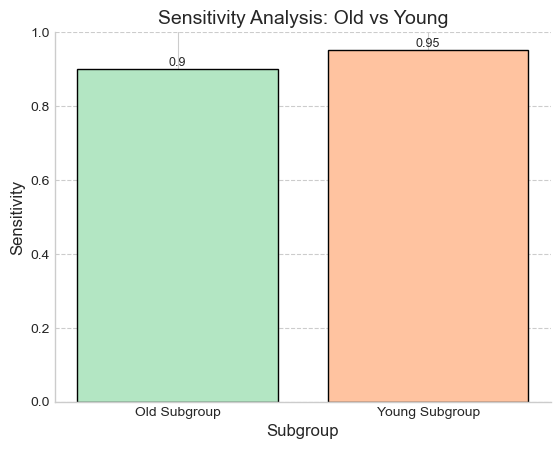

In [116]:
# Sensitivity values for old and young subgroups
old_sensitivities = [0.90]
young_sensitivities = [0.95]

# Create a bar plot
labels = ['Old Subgroup', 'Young Subgroup']
sensitivities = [old_sensitivities[0], young_sensitivities[0]]
colors = ['#B3E6C3', '#FFC3A0']

plt.bar(labels, sensitivities, color=colors, edgecolor='black', linewidth=1)

# Add data labels above each bar
for i, v in enumerate(sensitivities):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', fontsize=9)

# Customize the plot
plt.xlabel('Subgroup', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.title('Sensitivity Analysis: Old vs Young', fontsize=14)
plt.ylim(0, 1)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### 3.3 Sensitivity Analysis - Subgroup Analysis Based on BMI

In [117]:
# Load demographics data
demographics_df = pd.read_excel(xlsx, 'Demographics Clinical')

# Merge radiomics and demographics dataframes based on id_subject
merged_df = pd.merge(radiomics_df, demographics_df, on='id_subject')

# Convert BMI values to numeric format
merged_df['BMI'] = merged_df['BMI'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

# Extract the patient IDs and labels
patient_ids = merged_df.iloc[:, 0].values
labels = np.array([1 if i < 33 else 0 for i in range(len(patient_ids))])

# Normalize the features
scaler = StandardScaler()
data = scaler.fit_transform(merged_df.iloc[:, 1:-1].values)

# Split the dataset into training and test sets (0.8 vs 0.2)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

# Define the subgroups based on BMI
subgroups = ['Underweight', 'Healthy Range', 'Overweight/Obesity']
subgroup_ranges = [(0, 18.5), (18.5, 25), (25, np.inf)]

# Perform subgroup analysis
metrics_per_subgroup = []

for i, (subgroup, (min_bmi, max_bmi)) in enumerate(zip(subgroups, subgroup_ranges)):
    print(f"\nAnalyzing subgroup: {subgroup}")

    subgroup_indices = np.where((merged_df['BMI'] >= min_bmi) & (merged_df['BMI'] < max_bmi))[0]
    subgroup_data = data[subgroup_indices]
    subgroup_labels = labels[subgroup_indices]
    
    # Calculate the number of samples in the subgroup
    num_samples = len(subgroup_data)

    if num_samples == 0:
        print("No samples in this subgroup. Skipping analysis.")
        continue

    # Print the number of samples in the subgroup
    print(f"Number of samples in subgroup: {num_samples}")

    if len(subgroup_data) == 0:
        print("No samples in this subgroup. Skipping analysis.")
        continue

    # Split the subgroup dataset into training and validation sets
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    accuracies = []
    sensitivities = []
    aucs = []

    for train_index, val_index in skf.split(subgroup_data, subgroup_labels):
        X_train_fold, X_val_fold = subgroup_data[train_index], subgroup_data[val_index]
        y_train_fold, y_val_fold = subgroup_labels[train_index], subgroup_labels[val_index]

        # Apply PCA for feature selection
        pca = PCA(n_components=10)
        X_train_reduced = pca.fit_transform(X_train_fold)
        X_val_reduced = pca.transform(X_val_fold)

        # Train a Random Forest classifier
        clf = RandomForestClassifier(n_estimators=100)
        clf.fit(X_train_reduced, y_train_fold)

        # Make predictions on the validation set
        y_pred_val = clf.predict(X_val_reduced)
        y_prob_val = clf.predict_proba(X_val_reduced)[:, 1]

        # Compute metrics
        accuracies.append(accuracy_score(y_val_fold, y_pred_val))
        
        if len(np.unique(y_val_fold)) == 2:
            tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
            sensitivities.append(tp / (tp + fn))
            fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
            aucs.append(auc(fpr, tpr))

    # Calculate average metrics for the subgroup
    avg_accuracy = np.mean(accuracies)
    avg_sensitivity = np.mean(sensitivities) if len(sensitivities) > 0 else 0
    avg_auc = np.mean(aucs) if len(aucs) > 0 else 0

    # Store the metrics for the subgroup
    subgroup_metrics = {'Accuracy': avg_accuracy, 'Sensitivity': avg_sensitivity, 'AUC': avg_auc}
    metrics_per_subgroup.append(subgroup_metrics)

    # Print the results for the subgroup
    print(f"\nResults for subgroup: {subgroup}")
    for metric, value in subgroup_metrics.items():
        print(f"{metric}: {value:.4f}")



Analyzing subgroup: Underweight
No samples in this subgroup. Skipping analysis.

Analyzing subgroup: Healthy Range
Number of samples in subgroup: 24


/Users/diogjen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(



Results for subgroup: Healthy Range
Accuracy: 0.9000
Sensitivity: 1.0000
AUC: 1.0000

Analyzing subgroup: Overweight/Obesity
Number of samples in subgroup: 29

Results for subgroup: Overweight/Obesity
Accuracy: 0.9333
Sensitivity: 0.8500
AUC: 1.0000


### Sensitivity Analysis by Age using Bar Plot 

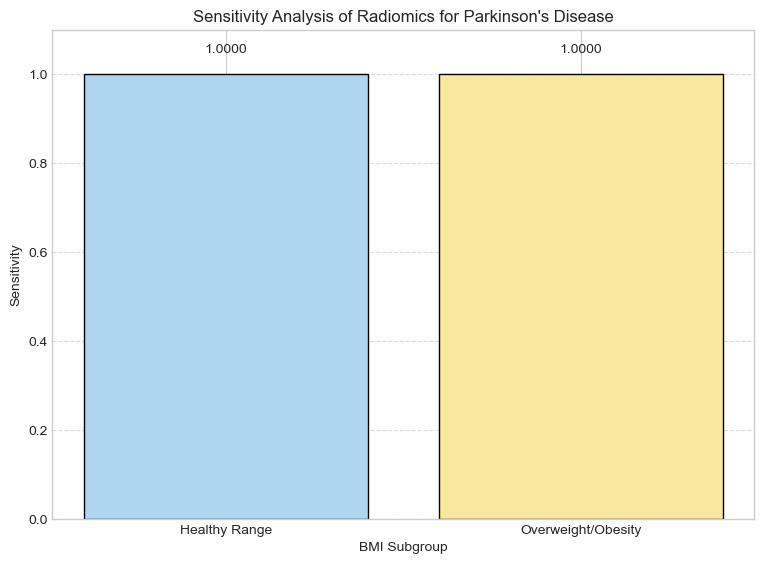

In [118]:
# Define the subgroups and corresponding sensitivity values
subgroups = ['Healthy Range', 'Overweight/Obesity']
sensitivities = [1.0000, 1.0000]

# Define the colors for the plot
colors = ['#AED6F1', '#F9E79F']

# Plot the sensitivity values
plt.figure(figsize=(8, 6))
plt.bar(subgroups, sensitivities, color=colors, edgecolor='black')
plt.xlabel('BMI Subgroup')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Analysis of Radiomics for Parkinson\'s Disease')
plt.ylim(0, 1.1)

# Add labels on top of the columns
for i in range(len(subgroups)):
    plt.text(i, sensitivities[i] + 0.05, f'{sensitivities[i]:.4f}', ha='center')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between the title and the columns
plt.tight_layout(pad=2)

# Show the plot
plt.show()